## **Crop Recommendation System**

#### Life cycle of The Machine learning Project

- Understanding the Problem Statement,
    - Data Collection,
    - Data Checks to perform,
    - Exploratory data analysis,
    - Data Pre-Processing,
    - Model Training,
    - Choose best model,
    - Save model in pickle
    


  ### 1) Problem statement

This project shows how weather conditions and soil nutrients such as temperature, humidity, nitrogen, phosphorus, potassium, ph and 
rainfall, can help to predict crop type (Class Label) to be planted on a farm land.
    


  ### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset,
- The data consists of 8 column and 2200 rows.

### 2.1 Import Data and Required Packages,
  ####  Importing Pandas, Numpy, Matplotlib, Seaborn, opendatasets for kaggle dataset loading and Warnings Library.

In [1]:
# import opendatasets as od

# download_url = 'https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset'
# od.download(download_url)
# dataset_filename = './crop-recommendation-dataset/Crop_recommendation.csv'

  #### Created and imported custom function as a module to check dataset statistics
  #### Import the CSV Data as Pandas DataFrame
  #### Show Top 5 Records

In [2]:
def crop_dataset(url):
  import pandas as pd
  df = pd.read_csv(url)
  return df


import warnings
warnings.filterwarnings('ignore')
import sys
import pandas as pd
from scipy import stats
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.options.display.float_format = '{:.5f}'.format
df = crop_dataset('data/Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.87974,82.00274,6.50299,202.93554,rice
1,85,58,41,21.77046,80.31964,7.03810,226.65554,rice
2,60,55,44,23.00446,82.32076,7.84021,263.96425,rice
3,74,35,40,26.49110,80.15836,6.98040,242.86403,rice
4,78,42,42,20.13017,81.60487,7.62847,262.71734,rice


#### Shape of the dataset

In [3]:
print("The shape of the dataset is: ", df.shape)

The shape of the dataset is:  (2200, 8)


### 2.2 Dataset Information


This dataset was build by augmenting datasets of rainfall, climate and fertilizer data available for India.

- N - ratio of Nitrogen content in soil
- P - ratio of Phosphorous content in soil
- K - ratio of Potassium content in soil
- temperature - temperature in degree Celsius
- humidity - relative humidity in %
- ph - ph value of the soil
- rainfall - rainfall in mm

#### Label Information
This consist of unique crops in india, which are information supplied by farmers.

In [4]:
pd.DataFrame(df.label.unique(),columns=['Labels'])

,Labels
0,rice
1,maize
2,chickpea
3,kidneybeans
4,pigeonpeas
5,mothbeans
6,mungbean
7,blackgram
8,lentil
9,pomegranate


##### Label counts

In [5]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

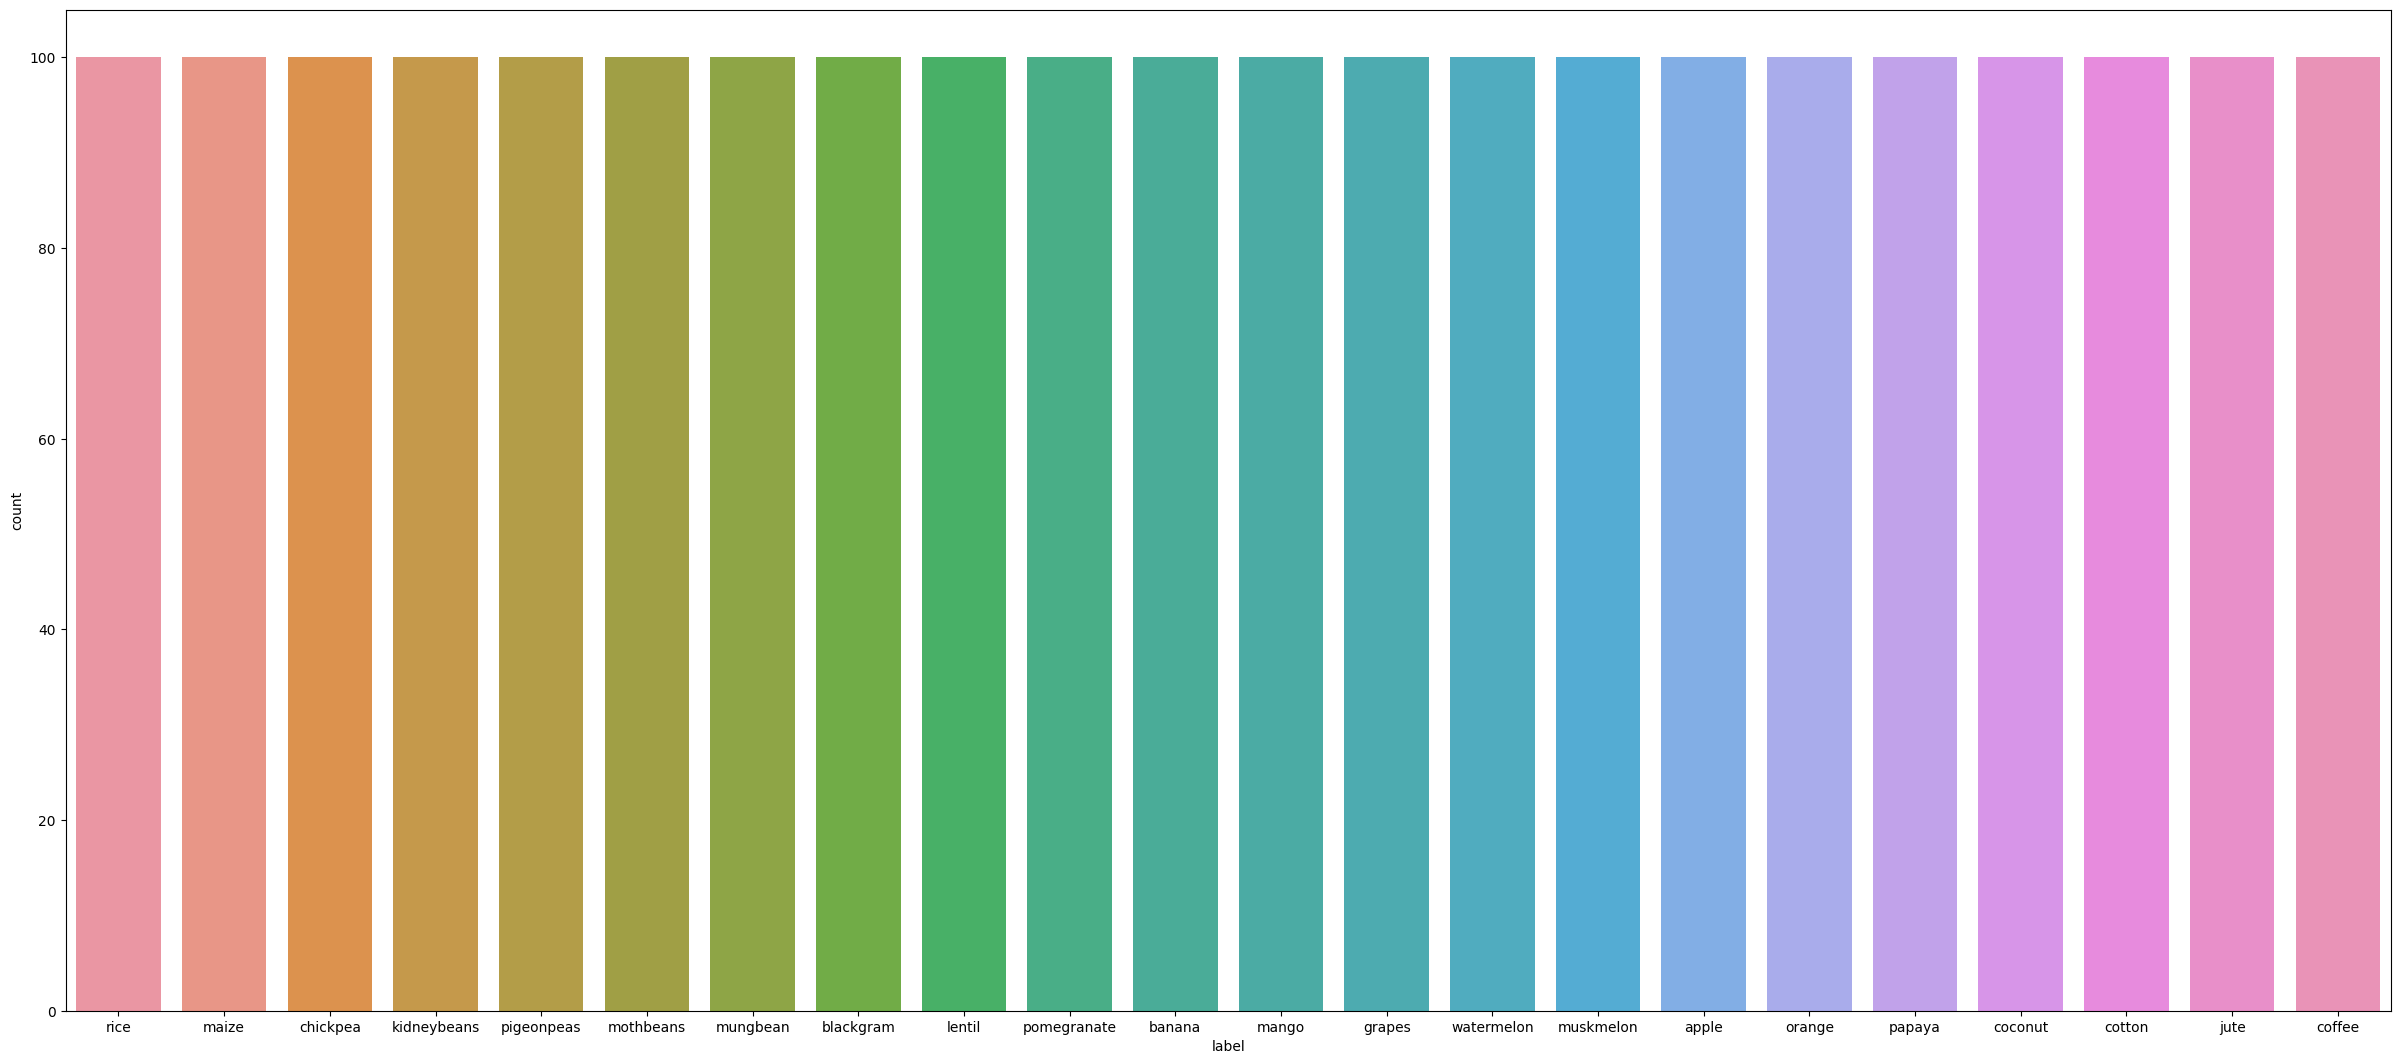

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30, 13))
sns.countplot(x = df['label']);

##### Calculating the randomness of the class label

In [7]:
#separating the target variable from the features
import numpy as np

X = df.drop('label', axis=1)
y = df['label']

#calculating the gini coefficient
#counting the total number of samples
N = len(y)

#counting the number of classes 
classes = np.unique(y)

#calculating the probability of each class
prob = [np.mean(y == c) for c in classes]

#calculating the gini coefficient
gini = 1 - sum([p**2 for p in prob])

#printing the gini coefficient
print('Gini Coefficient:', gini)

Gini Coefficient: 0.9545454545454546


The gini coefficient value shows a highly disparsed or divergent class label

## 3. Data Checks to Perform 

- Check Missing Values
- Check Duplicates
- Check Statistics of dataset
- Check for Unique values for each feature
- Test for Normality

#### 3.1 Check for Missing Values

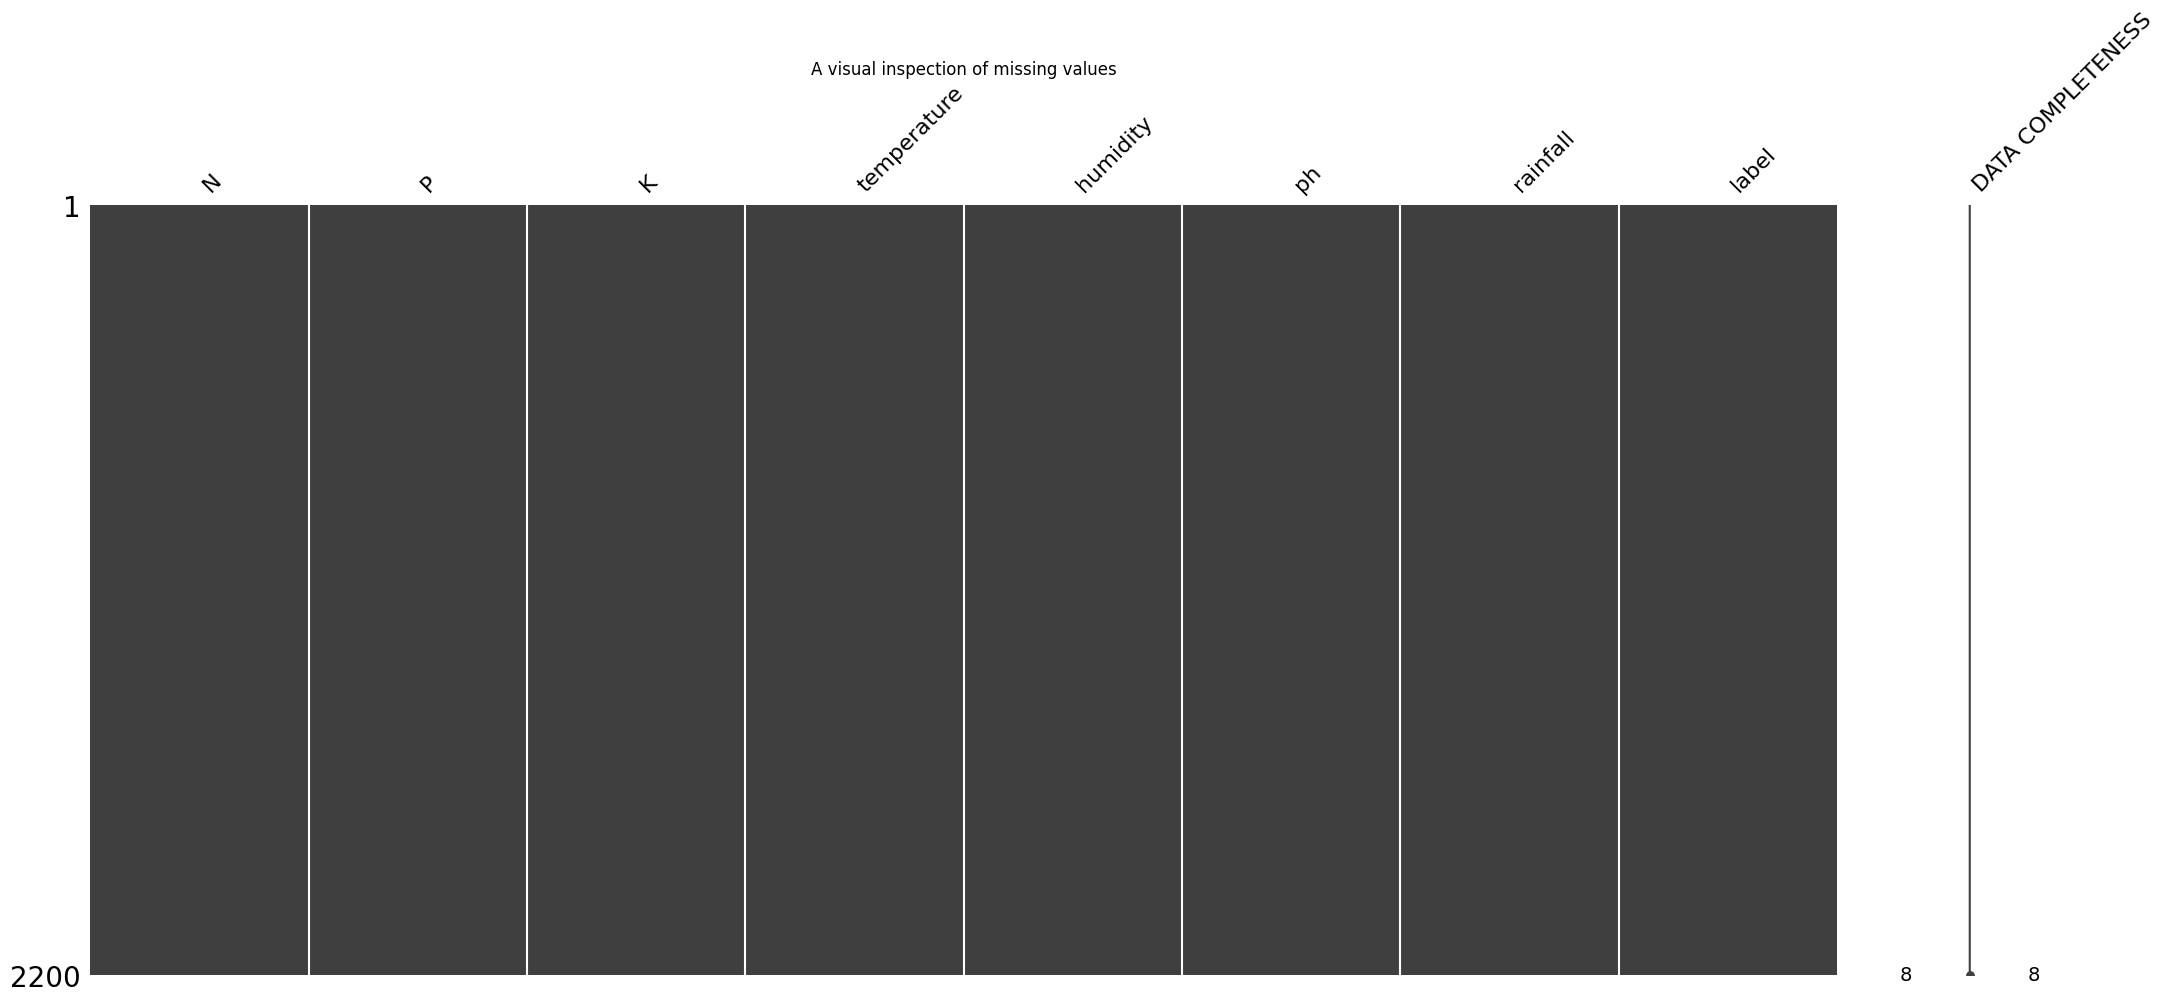

In [8]:
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(df, labels=True, sort="descending")
plt.title("A visual inspection of missing values")
plt.show()

In [9]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

There are no missing values in the dataset

#### 3.2 Create Basic Statistics for Dataset

In [10]:
def unistats(data):
    
    import pandas as pd
    new_df = pd.DataFrame(columns=['Count', 'Missing', 'Unique', 'Dtype', 'Numeric', 'Mode', 'Mean', 'Min', '25%', 'Median', '75%', 'Max', 'Std', 'Skew', 'Kurt'])


    for col in df:
        if pd.api.types.is_numeric_dtype(df[col]):
            new_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(), df[col].dtype, pd.api.types.is_numeric_dtype(df[col]),
                         df[col].mode().values[0], df[col].mean(), df[col].min(), df[col].quantile(0.25), df[col].median(), df[col].quantile(0.75),
                         df[col].max(), df[col].std(), df[col].skew(), df[col].kurt()]
        else:
            new_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(), df[col].dtype, pd.api.types.is_numeric_dtype(df[col]),
                         df[col].mode().values[0], '-', '-', '-', '-', '-', '-', '-', '-', '-']

    return new_df.sort_values(by=['Numeric', 'Unique'], ascending=False)

In [11]:
unistats(df)

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
temperature,2200,0,2200,float64,True,8.82567,25.61624,8.82567,22.76937,25.59869,28.56165,43.67549,5.06375,0.18493,1.23255
humidity,2200,0,2200,float64,True,14.25804,71.48178,14.25804,60.26195,80.47315,89.94877,99.98188,22.26381,-1.09171,0.30213
ph,2200,0,2200,float64,True,3.50475,6.46948,3.50475,5.97169,6.42505,6.92364,9.93509,0.77394,0.28393,1.65558
rainfall,2200,0,2200,float64,True,20.21127,103.46366,20.21127,64.55169,94.86762,124.26751,298.56012,54.95839,0.96576,0.60708
N,2200,0,137,int64,True,22,50.55182,0,21.00000,37.00000,84.25000,140,36.91733,0.50972,-1.05824
P,2200,0,117,int64,True,60,53.36273,5,28.00000,51.00000,68.00000,145,32.98588,1.01077,0.86028
K,2200,0,73,int64,True,17,48.14909,5,20.00000,32.00000,49.00000,205,50.64793,2.37517,4.44935
label,2200,0,22,object,False,apple,-,-,-,-,-,-,-,-,-


The skewness value for humidity is slightly above -1 making it a bit left skewed while potassium (K) is greatly skewed to the right which surpasses the acceptable value of 1. K would be investigated to analyses the effect they have on the target column. The kurtosis value of K also shows alot of values with clustered together with little spread, while the value ph is a bit above the accepted value of 1 or -1. The label column is the only categorical variable within the dataset with 22 groups within the features and no observable missing values in the data

#### 3.3 Check for the distribution of Unique Values for each feature 

In [12]:
df.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

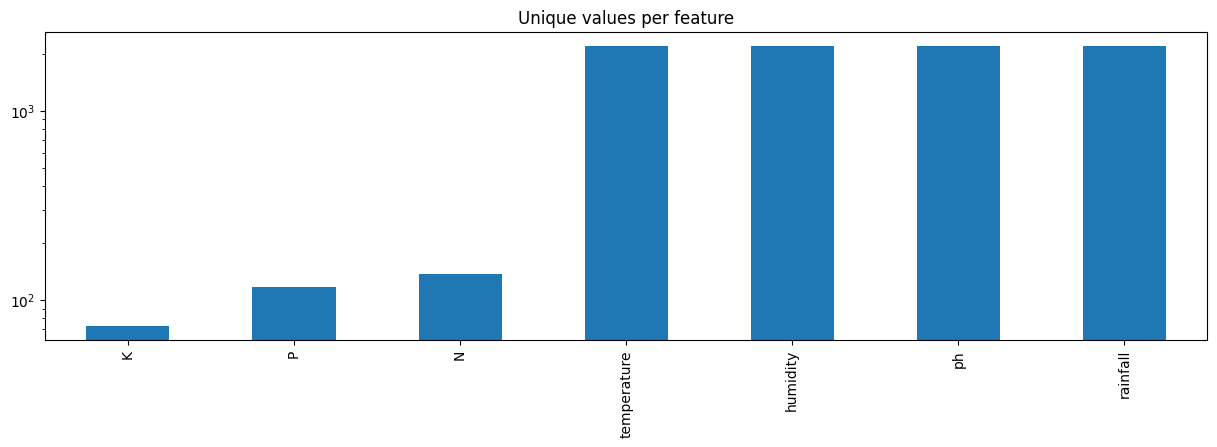

In [13]:
unique_values = df.select_dtypes(include="number").nunique().sort_values()
unique_values.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature");

#### 3.4 Check for Duplicates

In [14]:
df.duplicated().sum()

0

There are no duplicate values in the dataset

#### 3.5 Test for Normality

In [15]:
# Perform the Shapiro-Wilk test
df_sample = df.drop('label', axis=1)
r, p = stats.shapiro(df_sample)

# Print the p-value
# print('p-value:', p)
print('Statistics=%.3f, p=%.3f' % (r, p))
# Interpret the results
if p > 0.05:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.850, p=0.000
Sample does not look Gaussian (reject H0)


The dataset is not normal since the statistically significant p-value is less than 0.05

## 4 Exploring Data with Data Visualisation

#### 4.1 Observing Feature distribution with histogram

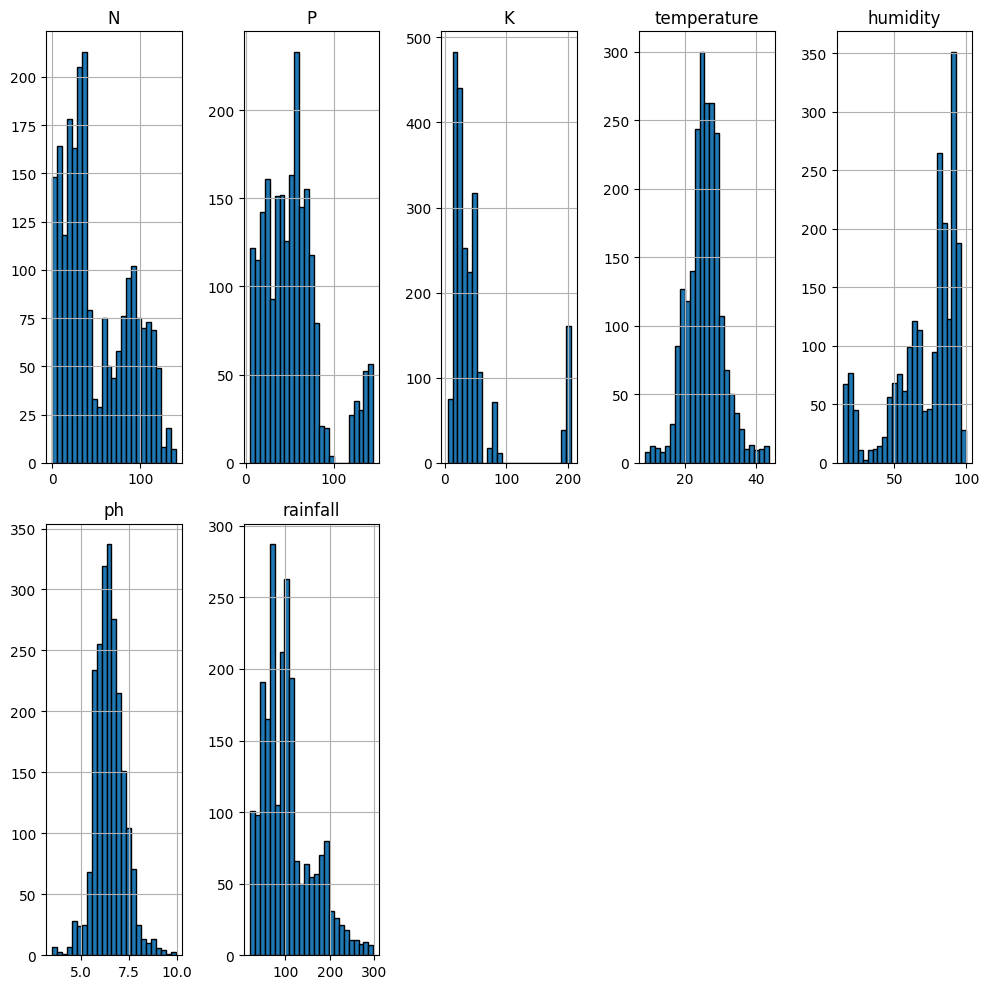

In [16]:
data_viz = pd.pivot_table(df,index=['label'],
aggfunc='mean')
df.hist(bins=25, figsize=(10, 10), layout=(-1, 5), edgecolor="black")
plt.tight_layout()

Feature Distribution of Each variable within the dataset.As seen below some of the feature appear normally distributed except N, P, K and humidity that resmebles a binomial distribution. While these may affect the ANOVA test on the categorical target column, we chose to use the regular ANOVA and T-Test 

## 5. Numeric To Numeric Analysis

#### 5.1 Relationship between Features

#### 5.1.1 Covariance

In [17]:
df.cov()

,N,P,K,temperature,humidity,ph,rainfall
N,1362.88954,-281.86010,-262.72715,4.95462,156.73070,2.76239,119.74715
P,-281.86010,1088.06846,1229.99865,-21.30348,-87.19732,-3.52349,-115.73069
K,-262.72715,1229.99865,2565.21287,-41.13423,215.21550,-6.64424,-148.81121
temperature,4.95462,-21.30348,-41.13423,25.64155,23.14740,-0.06974,-8.37218
humidity,156.73070,-87.19732,215.21550,23.14740,495.67731,-0.14616,115.53446
ph,2.76239,-3.52349,-6.64424,-0.06974,-0.14616,0.59898,-4.63920
rainfall,119.74715,-115.73069,-148.81121,-8.37218,115.53446,-4.63920,3020.42447


The relationship between ph and temperature/humidity shows a very negative low covariance suggesting that an increase in ph will have very minimal effect on temperature/humidity, while ph has a high negative relationship with P, K, and rainfall and a strong positive relationship with N

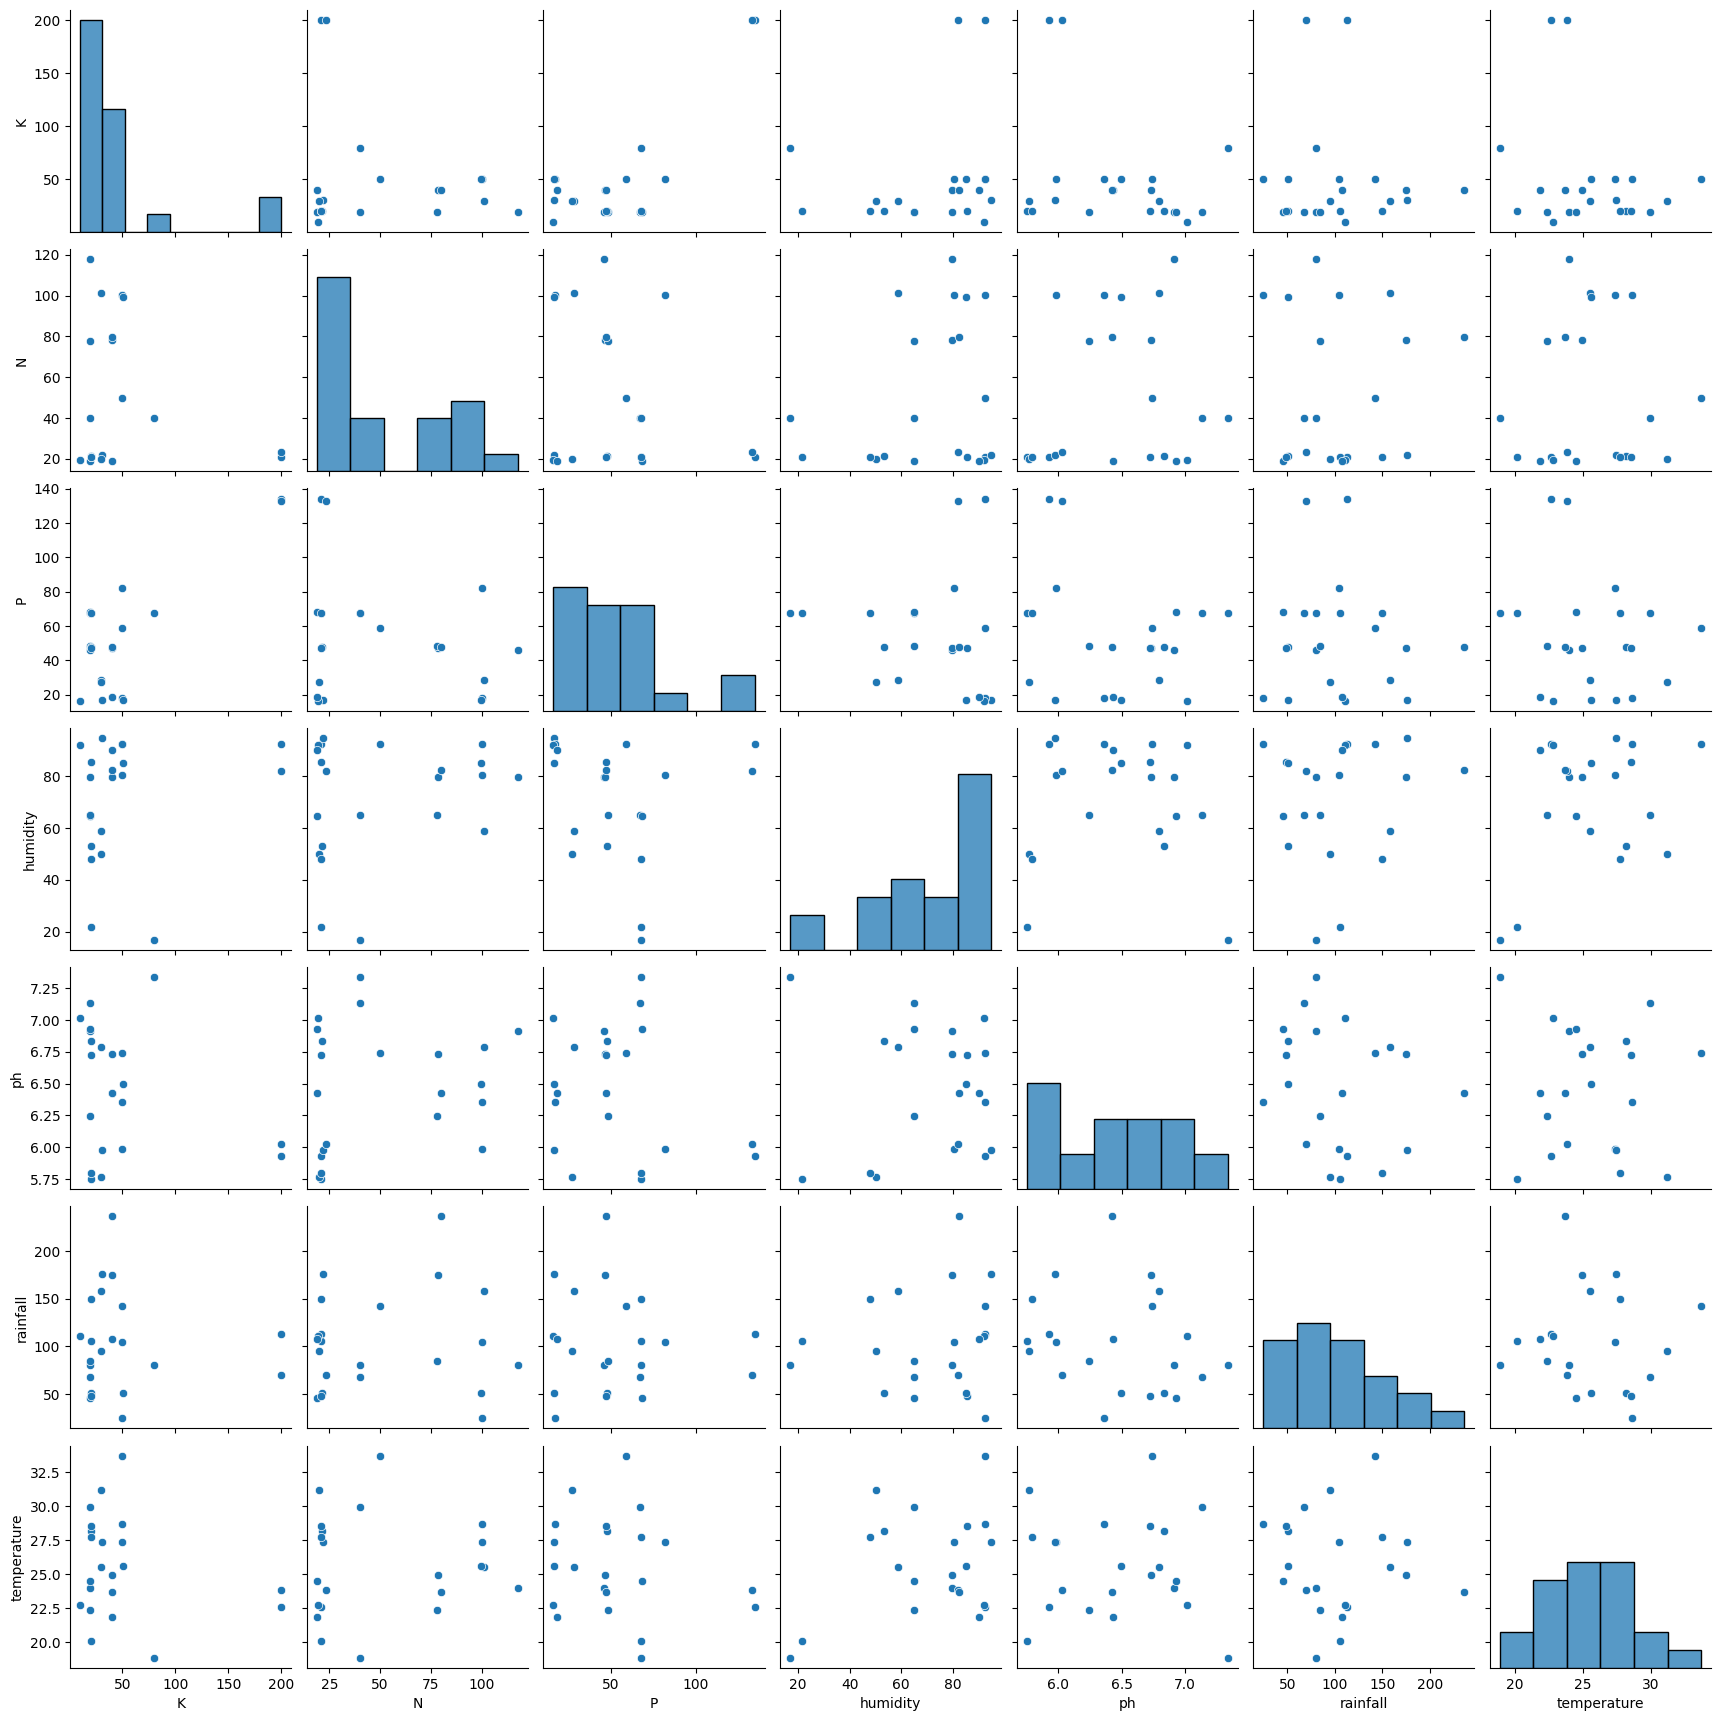

In [18]:
import seaborn as sns
sns.pairplot(data_viz);

#### 5.1.2 Correlation

In [19]:
df.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.00000,-0.23146,-0.14051,0.02650,0.19069,0.09668,0.05902
P,-0.23146,1.00000,0.73623,-0.12754,-0.11873,-0.13802,-0.06384
K,-0.14051,0.73623,1.00000,-0.16039,0.19086,-0.16950,-0.05346
temperature,0.02650,-0.12754,-0.16039,1.00000,0.20532,-0.01780,-0.03008
humidity,0.19069,-0.11873,0.19086,0.20532,1.00000,-0.00848,0.09442
ph,0.09668,-0.13802,-0.16950,-0.01780,-0.00848,1.00000,-0.10907
rainfall,0.05902,-0.06384,-0.05346,-0.03008,0.09442,-0.10907,1.00000


As seen from the correlation coefficients among the variables, this shows that most of the variables are independent of each other with the exception of K and P with a high value of correlation(0.74)  close to 1. We are assuming that the measure of effect size for a large correlation coefficient(r), is  r >.50

In [20]:
df.K.corr(df.P).round(2)

0.74

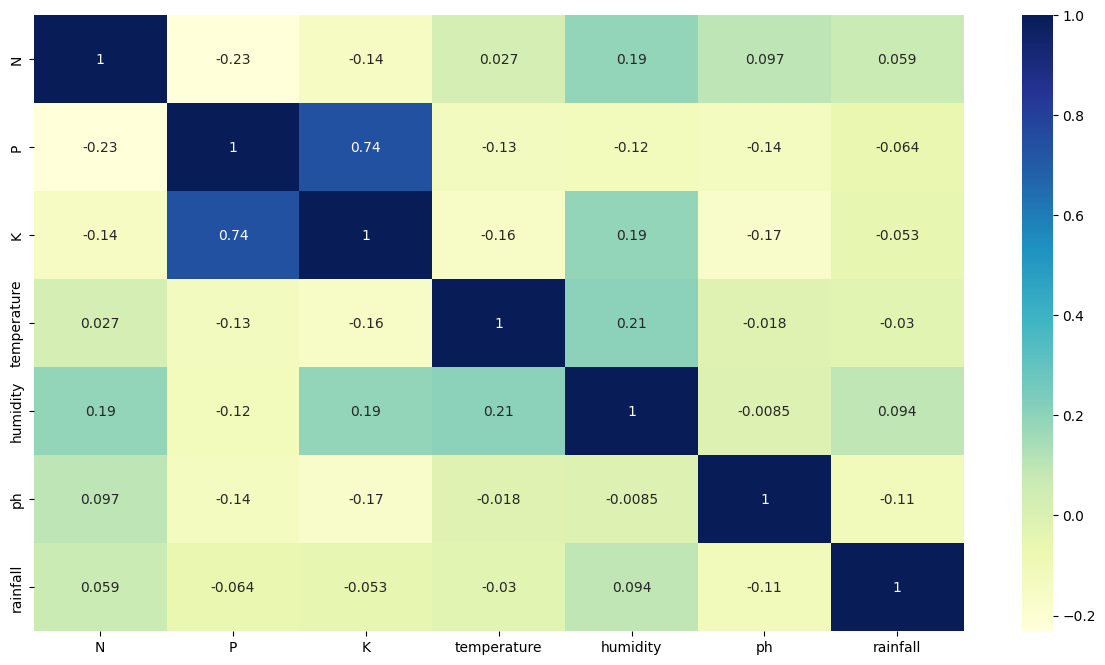

In [21]:
plt.figure(figsize=(15, 8))
dp = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

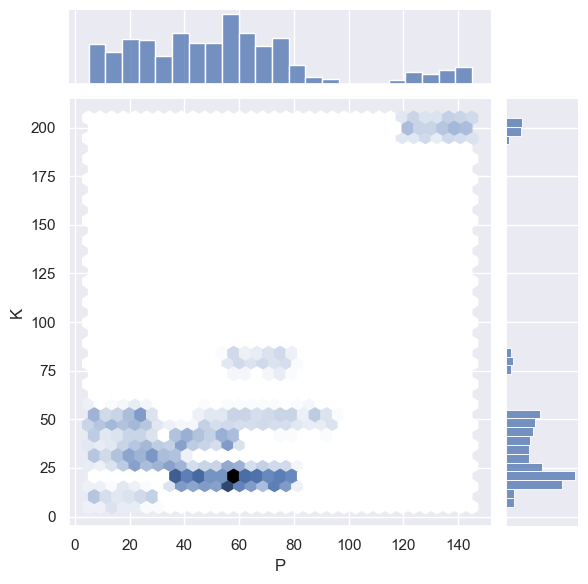

In [22]:
data_PK = pd.pivot_table(df,index=['label', 'P', 'K'])

sns.set(color_codes=True)
sns.jointplot(x='P', y='K', data=data_PK, kind='hex');

Majority of the data points are concentrated at the P(58) and K(24) points from the hexagonal dense data points on the plot.This can be implied that the concentration levels of P and K at this levels have a strong correlated effect on some of the target variables.

In [23]:
import pandas as pd
import plotly.express as px

fig = px.scatter_3d(df, x='P', y='K', z='humidity', color="N")
fig.show()

There are absolute condensation of data points among P, N and K, which further supports our initial assessment of a strong correlation between P and K. While N and rainfall has an interaction effect on the two macro-nutrients, humidity does not seems to affect them much, although it shows a fixed increasing values with lots of clusters around the point of convergence between P and K for certain crops.Substituting label on the Y-axis certain concentration of P,K,N the chart shows the crops that grow at these values. 

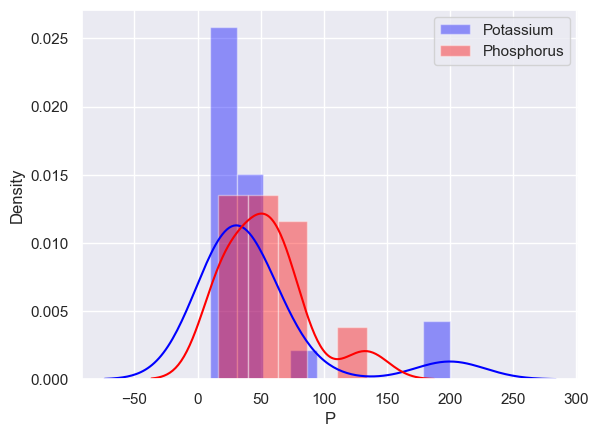

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(data_viz.K, color="blue", label="Potassium")
sns.distplot(data_viz.P, color="red", label="Phosphorus")
plt.legend()
plt.show()

K and P showed normal distribution plot in with lots of data spread across each other with relatively close mean, while P shows a slight rise during the decline phase that projects a binomial nature but quickly decreases. Consequently, the plot of humidity on the same chart showed a neglible difference in its mean to that of the P and K, but a corresponding spread that overlay the other two features. 

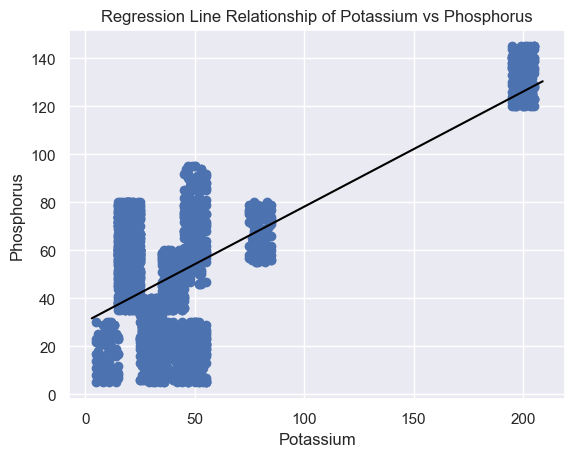

In [25]:
import matplotlib.pyplot as plt
from scipy import stats
m, b, r, p, err = stats.linregress(df.K, df.P)

x = range(3, 210)
y = m * x + b

plt.plot(x, y, color="black")
plt.scatter(df.K, df.P)
plt.title('Regression Line Relationship of Potassium vs Phosphorus')
plt.xlabel('Potassium')
plt.ylabel('Phosphorus')
plt.show()

This plot also support our earlier assumption that there is high correlation between P and K. This shows an upward trend between the two features.As the values of K increases in the soil sample, the values of P also increases, indicating a linear relationship between both features. However the diagram shows segmentations of clusters within the 0 - 100 values of both features and a separate cluster at the highest values of both features. 

In [26]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
from statsmodels.formula.api import ols

for i, col in enumerate(df):
  for i2, col2 in enumerate(df):
    if i2 > i:
      if pd.api.types.is_numeric_dtype(df[col]) and pd.api.types.is_numeric_dtype(df[col2]):
        model = ols(formula = col + '~' + col2, data=df).fit()
        print(col, col2)
        white_test = het_white(model.resid, model.model.exog)
        breuschpagen_test = het_breuschpagan(model.resid, model.model.exog)

        output_df = pd.DataFrame(columns=['LM stat', 'LM p', 'F stat', 'F stat p'])
        output_df.loc['white'] = white_test
        output_df.loc['Breusch-Pagen'] = breuschpagen_test
        output_df
output_df        

N P
N K
N temperature
N humidity
N ph
N rainfall
P K
P temperature
P humidity
P ph
P rainfall
K temperature
K humidity
K ph
K rainfall
temperature humidity
temperature ph
temperature rainfall
humidity ph
humidity rainfall
ph rainfall


,LM stat,LM p,F stat,F stat p
white,14.74069,0.00063,7.40994,0.00062
Breusch-Pagen,13.42166,0.00025,13.49177,0.00025


From the heteroscedasticity for a combination of all numeric columns, the p-values for the white and breuschpagen tests are  insignificant while the F stat and LM stat are significant.Showing that the features have even spread when they are plotted against each other. The same result seen in the test and plot of P, K and humidity.

In [27]:
from scipy import stats
corr_df = pd.DataFrame(columns=['r', 'p'])
for i, col1 in enumerate(df):
  for i2, col2 in enumerate(df):
    if i2 < i:
      if col1 != 'label' and col2 != 'label':
        r, p = stats.pearsonr(df[col1], df[col2])
        # print(col1, col2 +' -> r: ' + str(round(r, 4)))
        # print(col1, col2 +' -> p: ' + str(round(p, 4)))
        corr_df.loc[col1] = [round(r, 3), round(p, 3)]  
        corr_df.loc[col2] = [round(r, 3), round(p, 3)]   
corr_df

,r,p
P,-0.06400,0.00300
N,0.05900,0.00600
K,-0.05300,0.01200
temperature,-0.03000,0.15800
humidity,0.09400,0.00000
ph,-0.10900,0.00000
rainfall,-0.10900,0.00000


The low p-values for all the variables shows a likelihood that if another random sample of 2200 entries was collected from the population, it is likely to see the same negative correlation values of P,K,temperature, ph, and rainfall and the same positive correlation for N and humidity.

## 6. Categorical Label to Numeric Feature Analysis

In [28]:
from scipy import stats
import statistics as stat
import numpy as np

def anova(feature, label):
  groups = df[label].unique()
  grouped_values = []
  for group in groups:
    grouped_values.append(df[df[label] == group][feature])
  return stats.f_oneway(*grouped_values)

In [29]:
print(anova('N', 'label'))
print(anova('K', 'label'))
print(anova('P', 'label'))
print(anova('temperature', 'label'))
print(anova('humidity', 'label'))
print(anova('rainfall', 'label'))
print(anova('ph', 'label'))

F_onewayResult(statistic=897.5681863257125, pvalue=0.0)
F_onewayResult(statistic=27238.36206707328, pvalue=0.0)
F_onewayResult(statistic=1885.657859184262, pvalue=0.0)
F_onewayResult(statistic=102.18698122995393, pvalue=4.019323818173197e-305)
F_onewayResult(statistic=3103.708891217461, pvalue=0.0)
F_onewayResult(statistic=605.5279661441423, pvalue=0.0)
F_onewayResult(statistic=60.344033529413736, pvalue=6.493161898840498e-199)


All features appears to have a large effect size on the labels, which shows a statistically significant F-values and low p-values. Certain labels respond significantly to some independent features while other have minimal effect on them.Hence the effect of each column on the type of fruit planted is quite significant, notably K, P, humidity and N

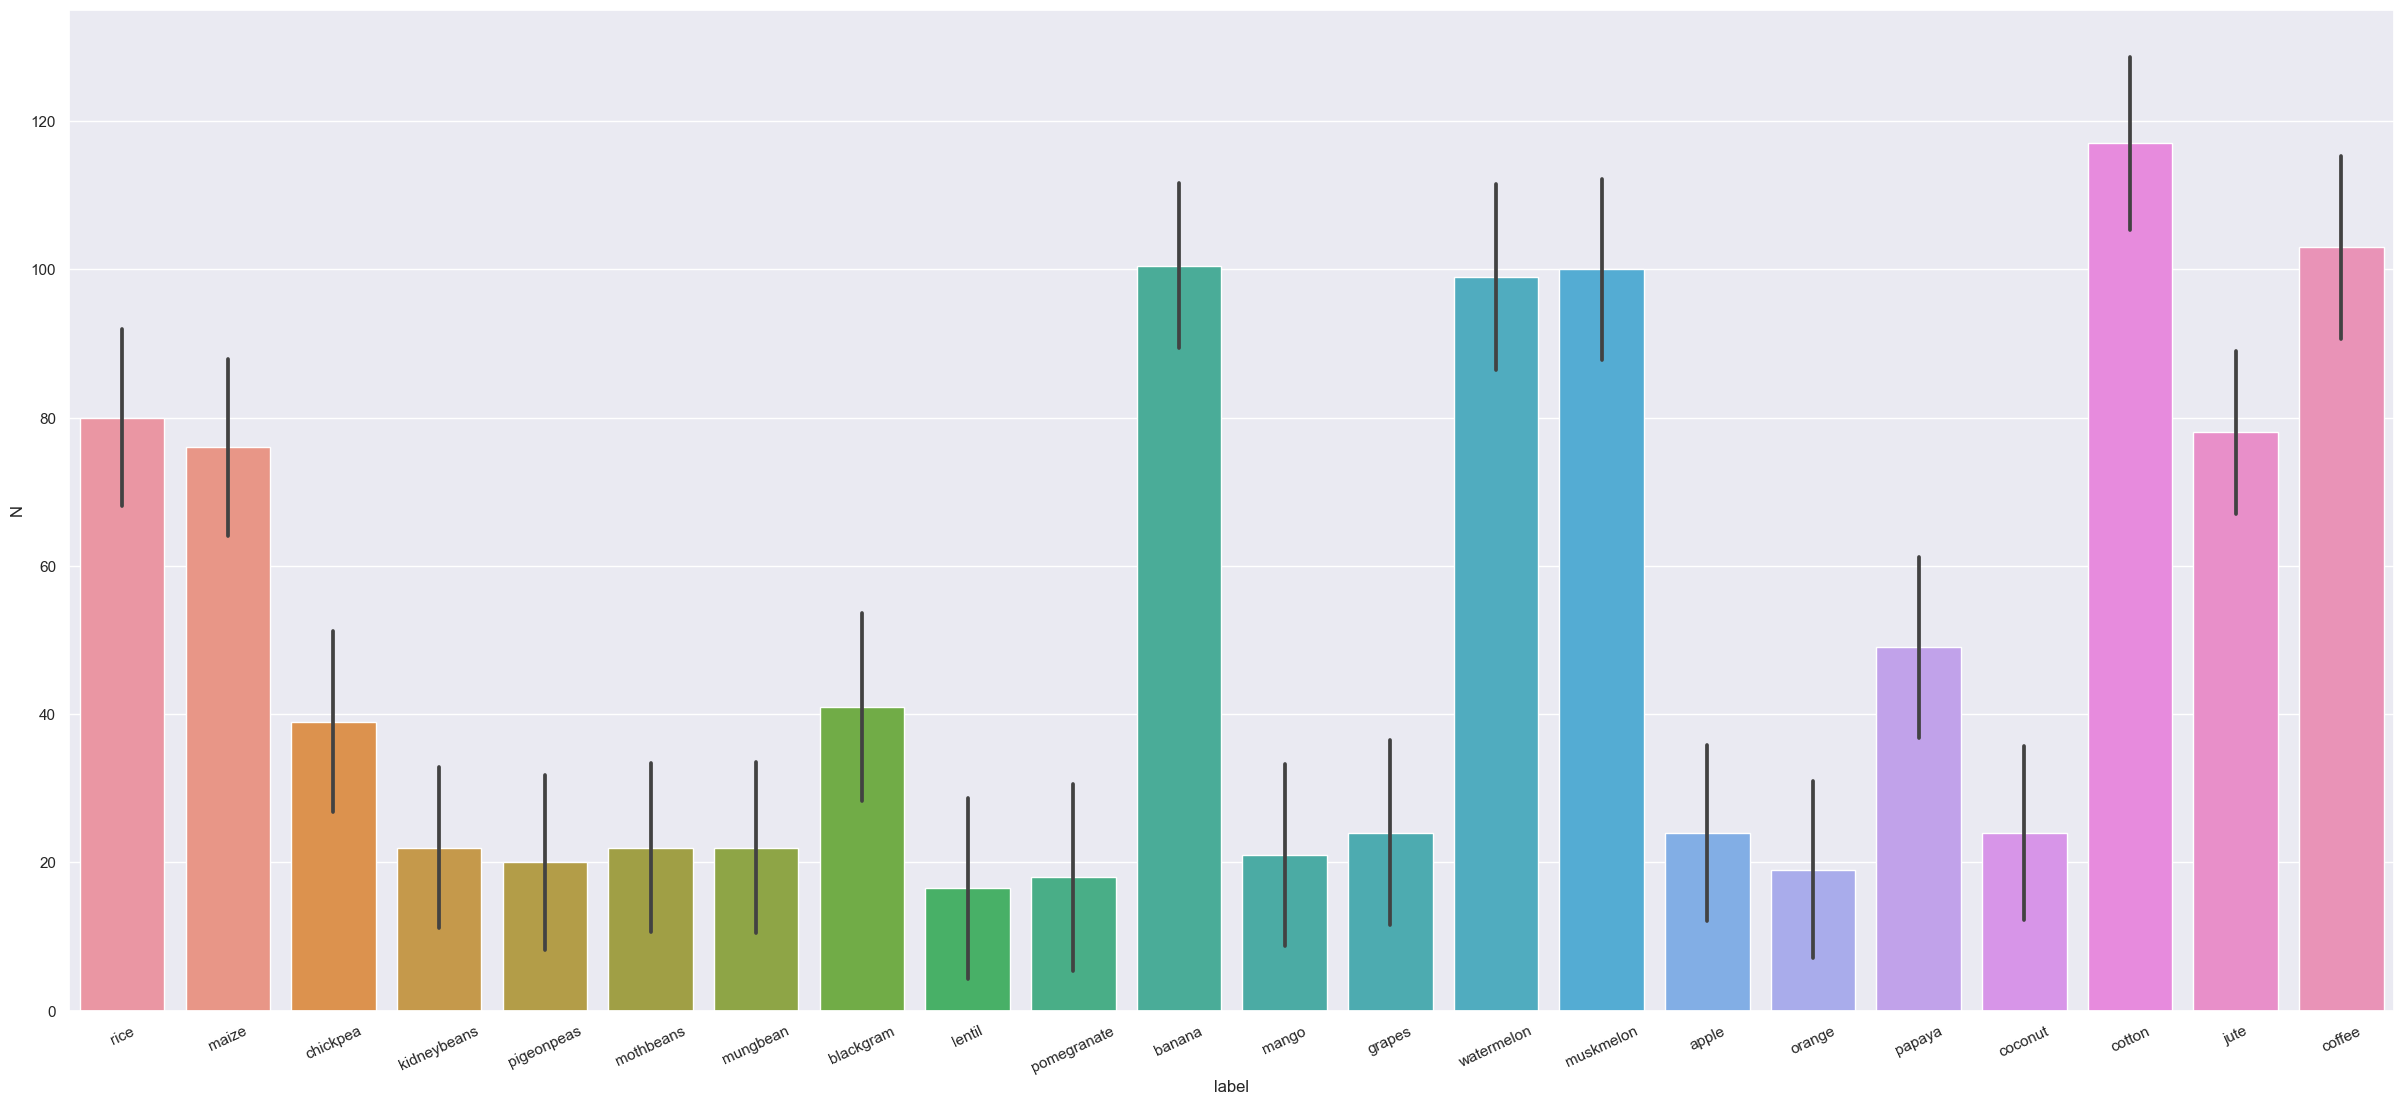

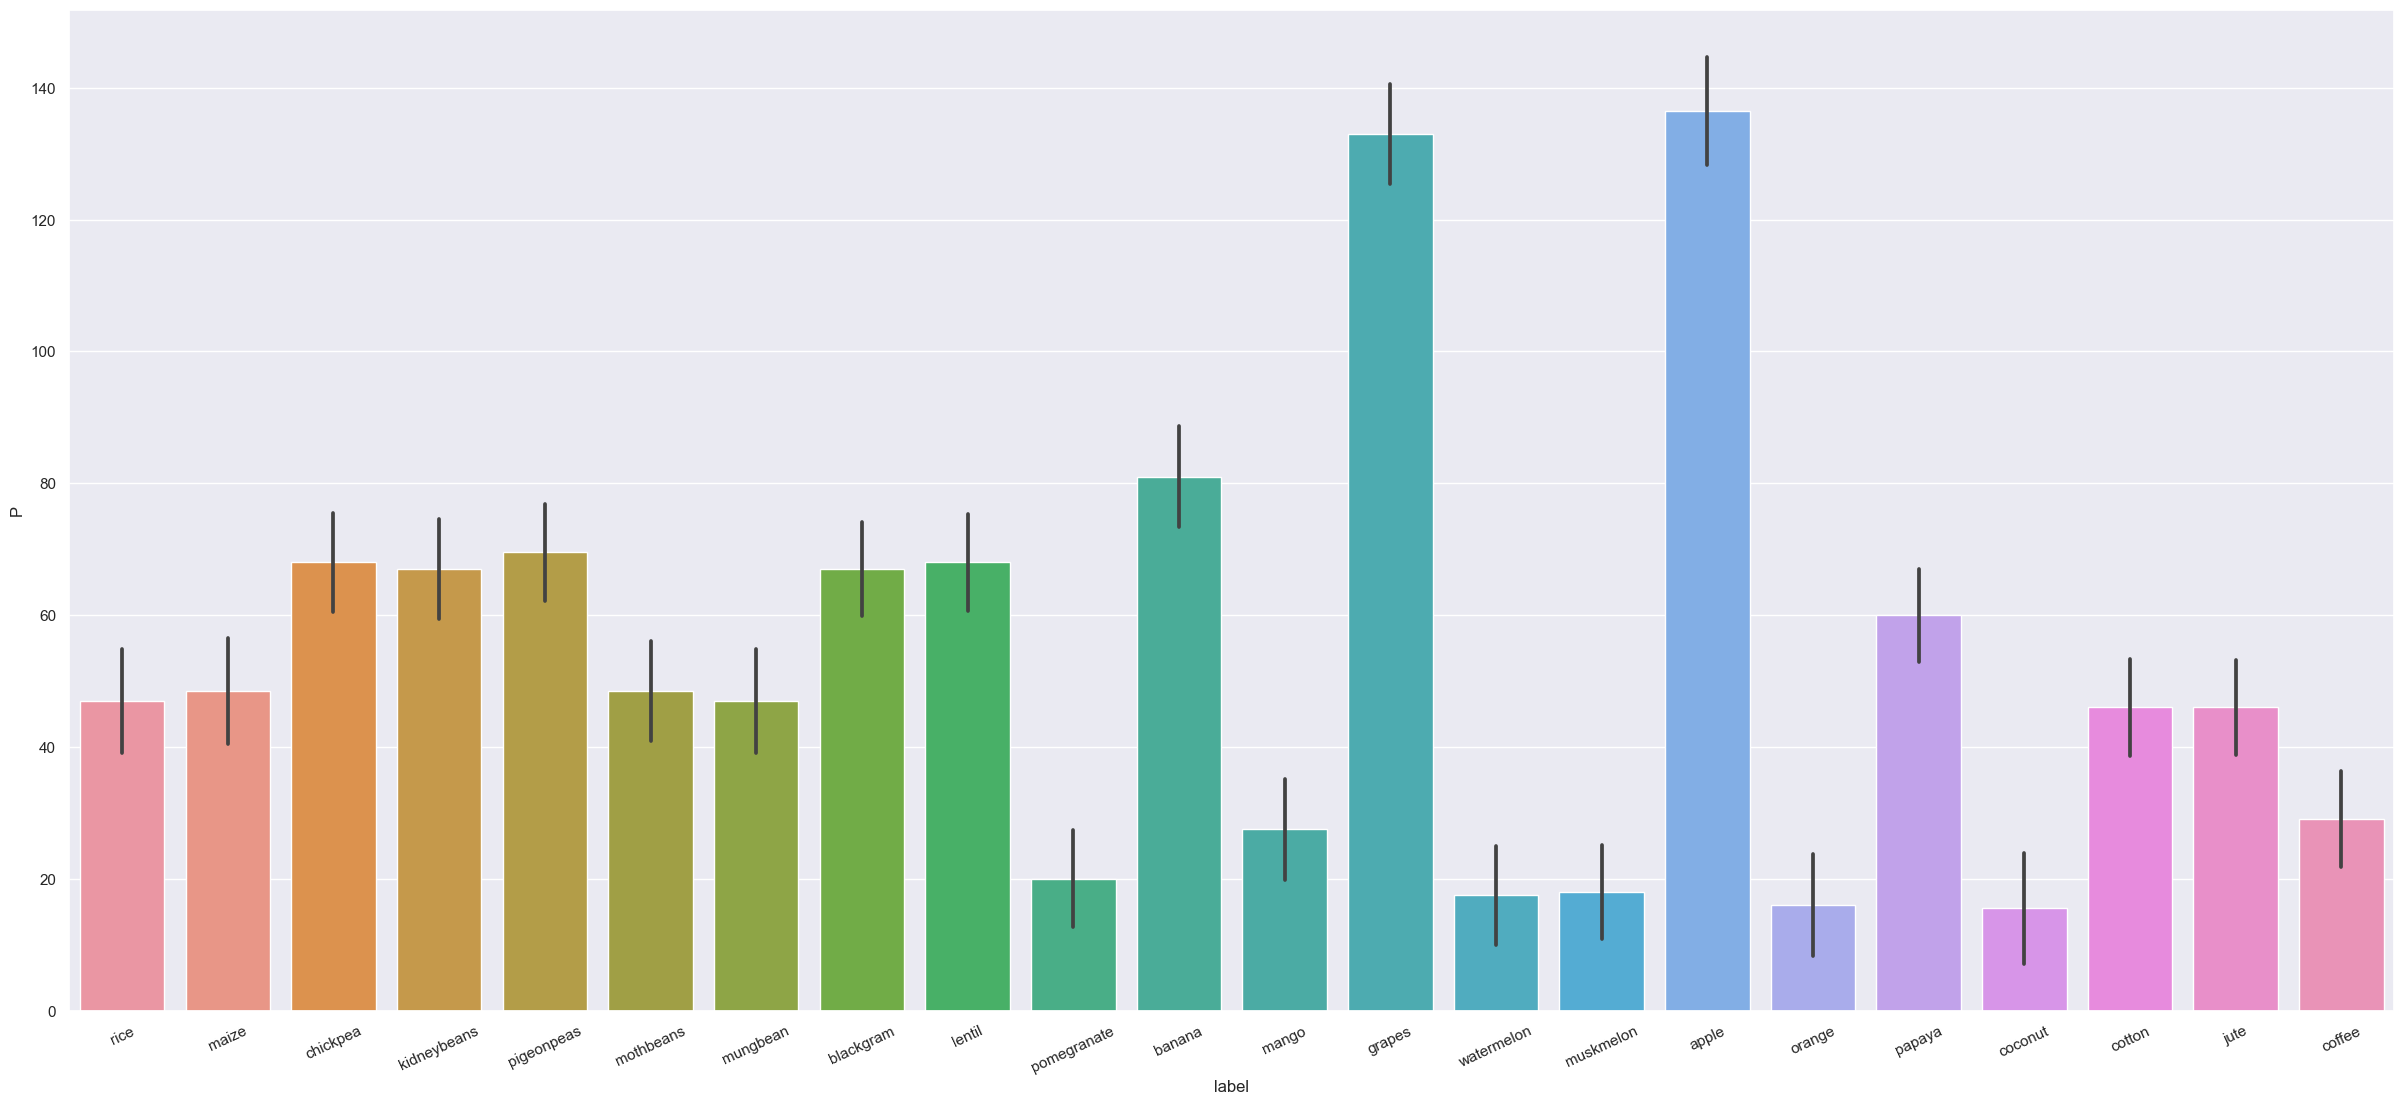

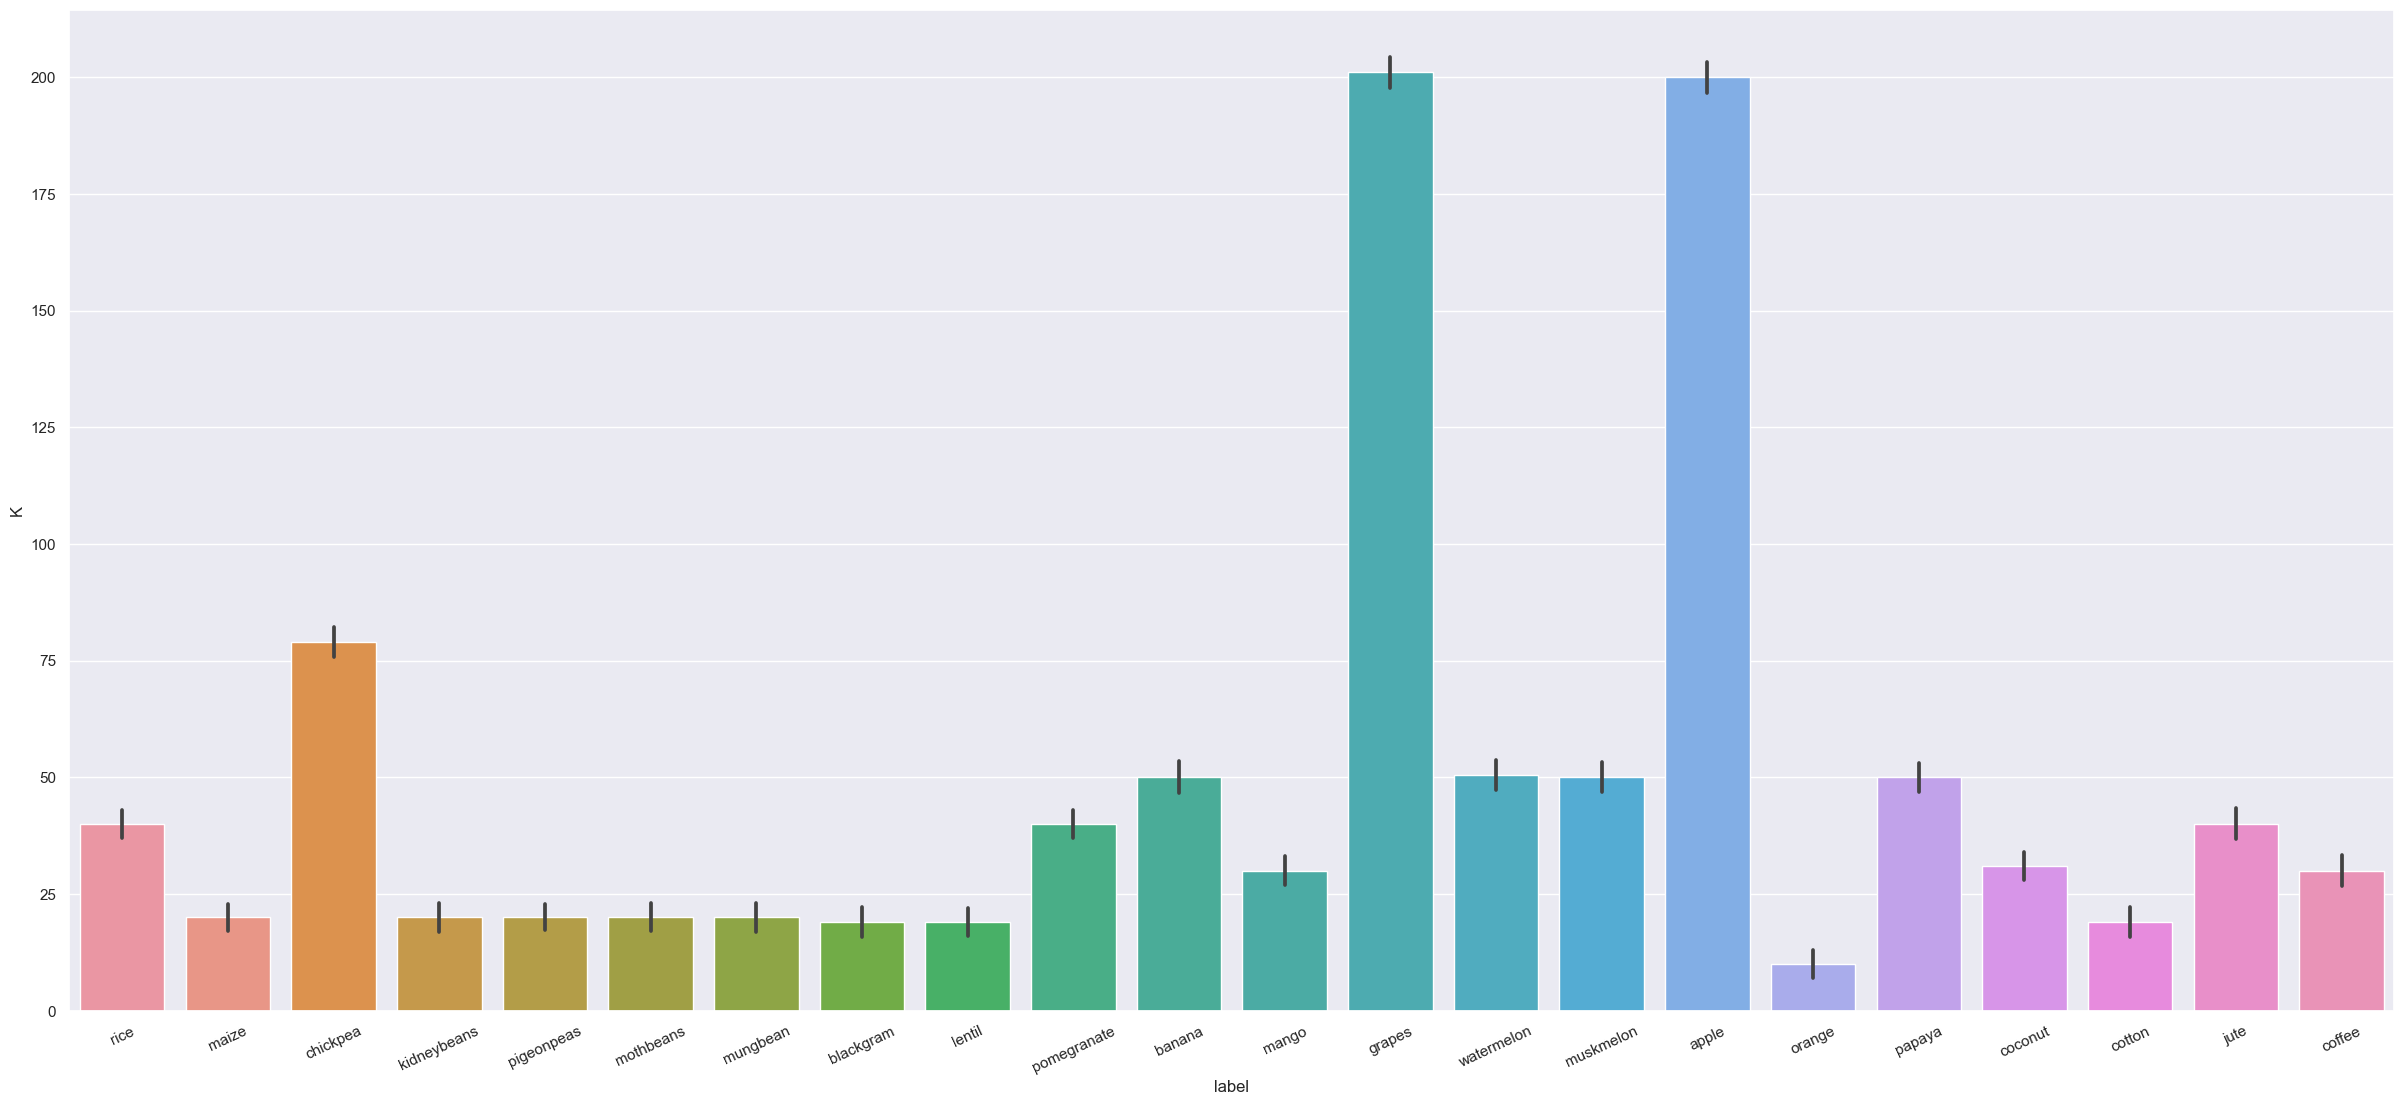

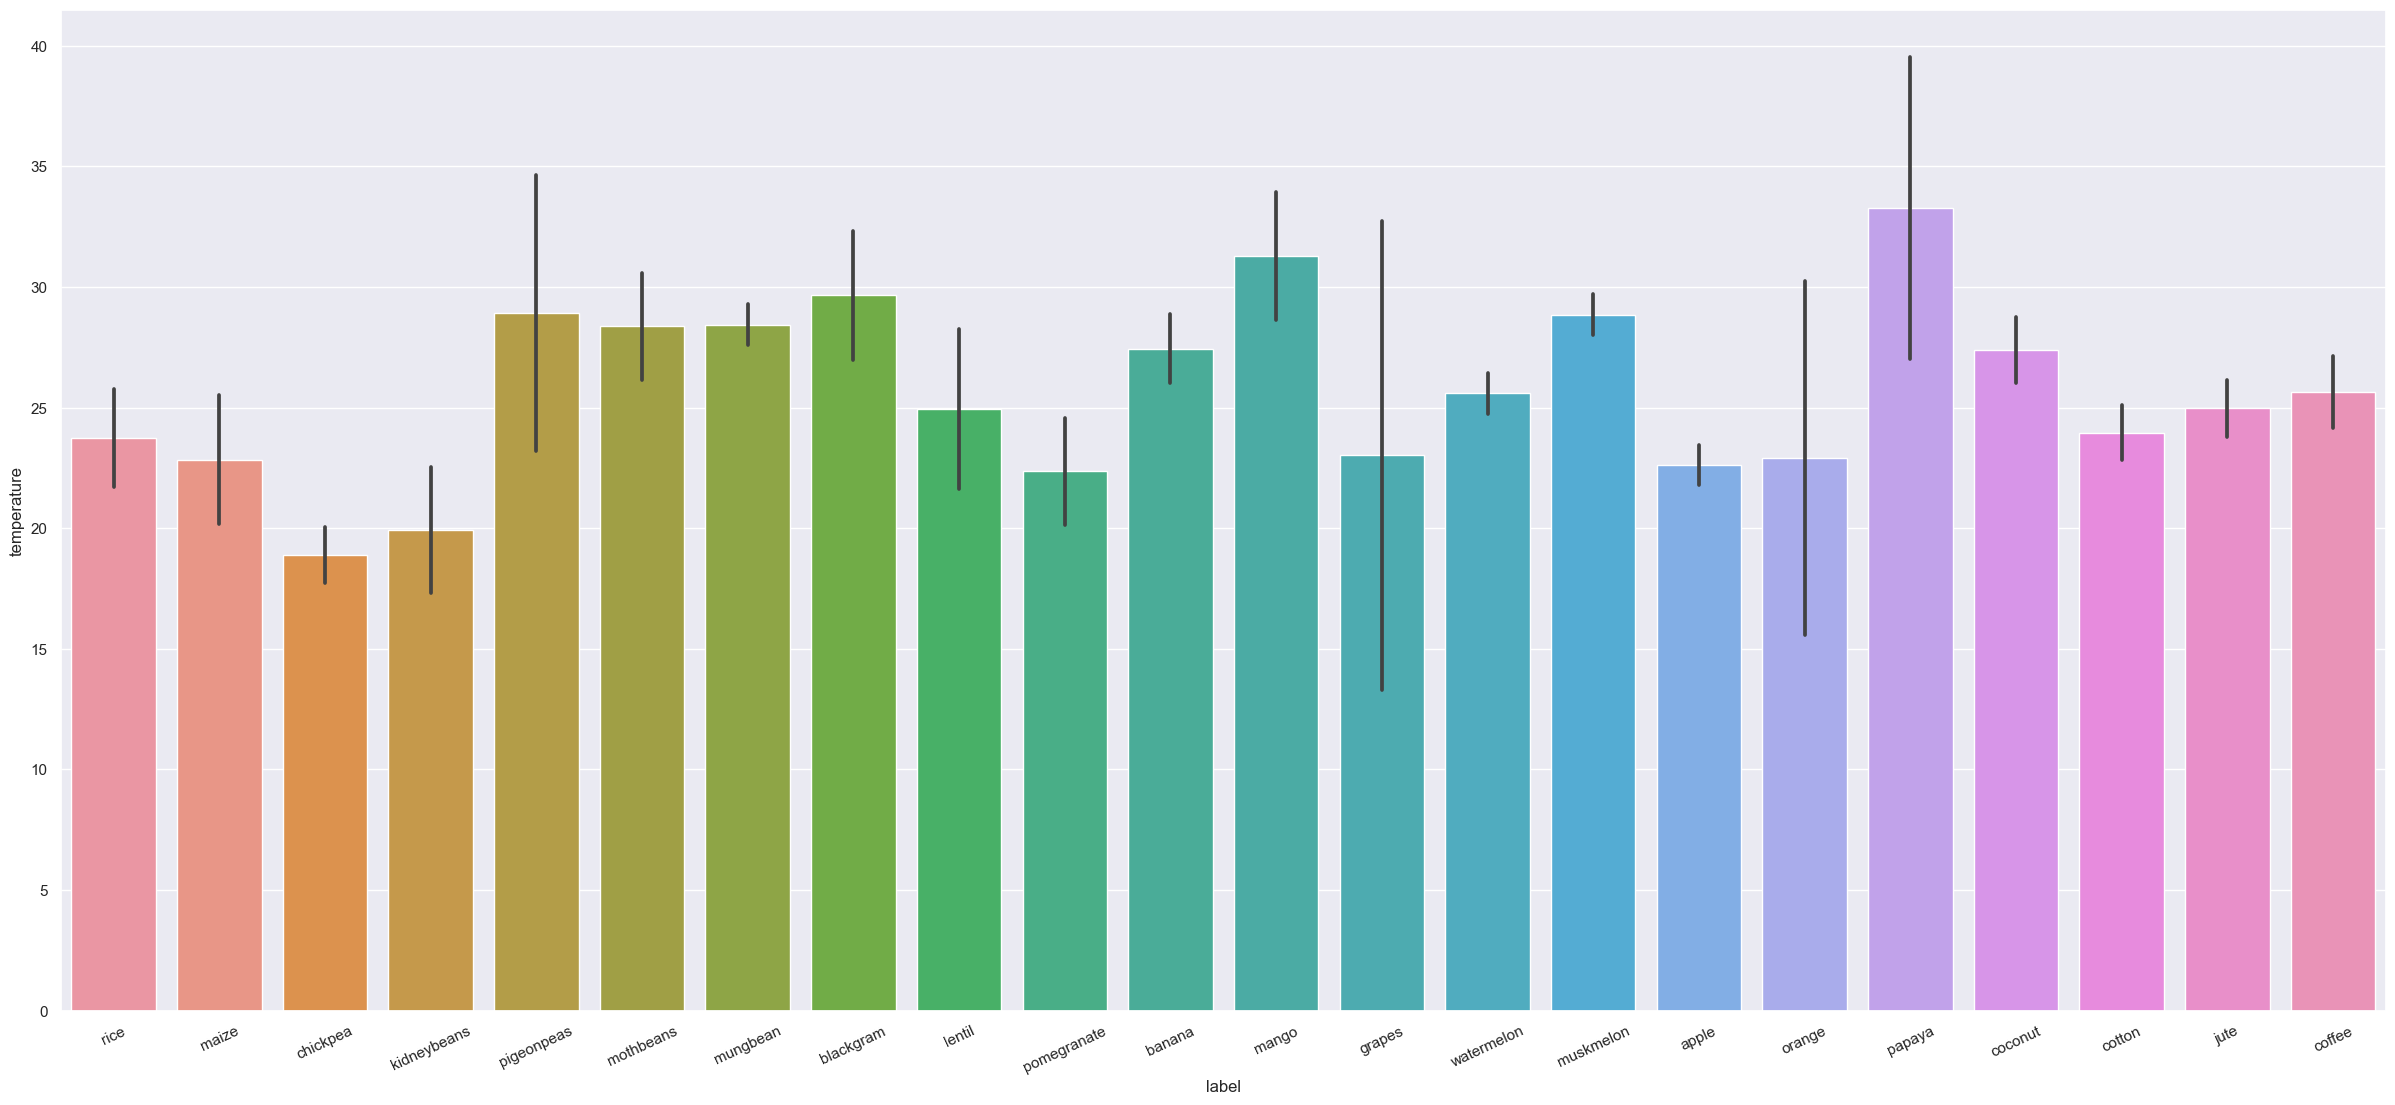

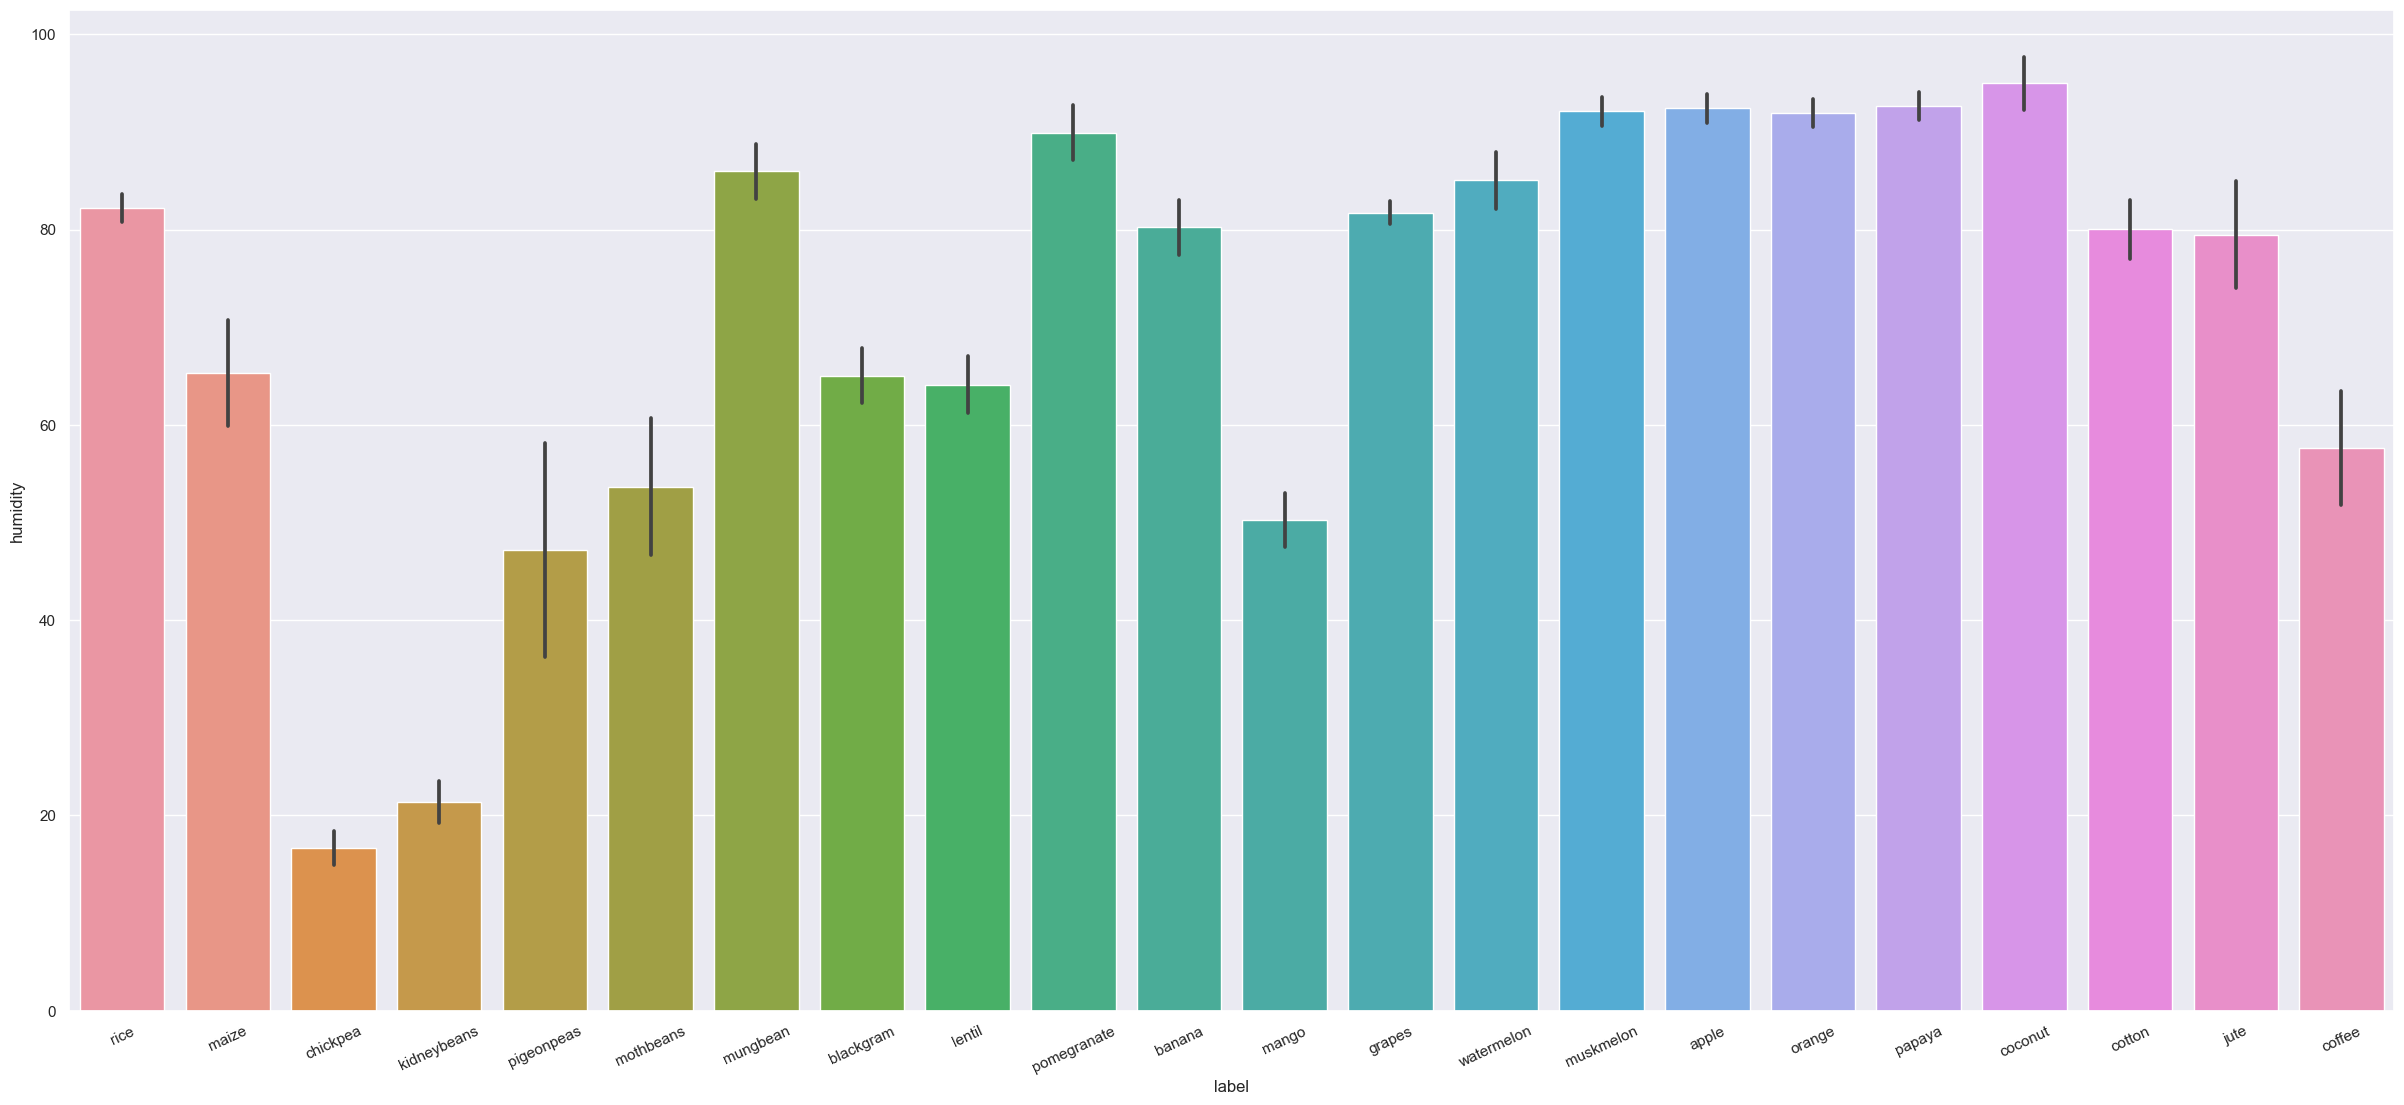

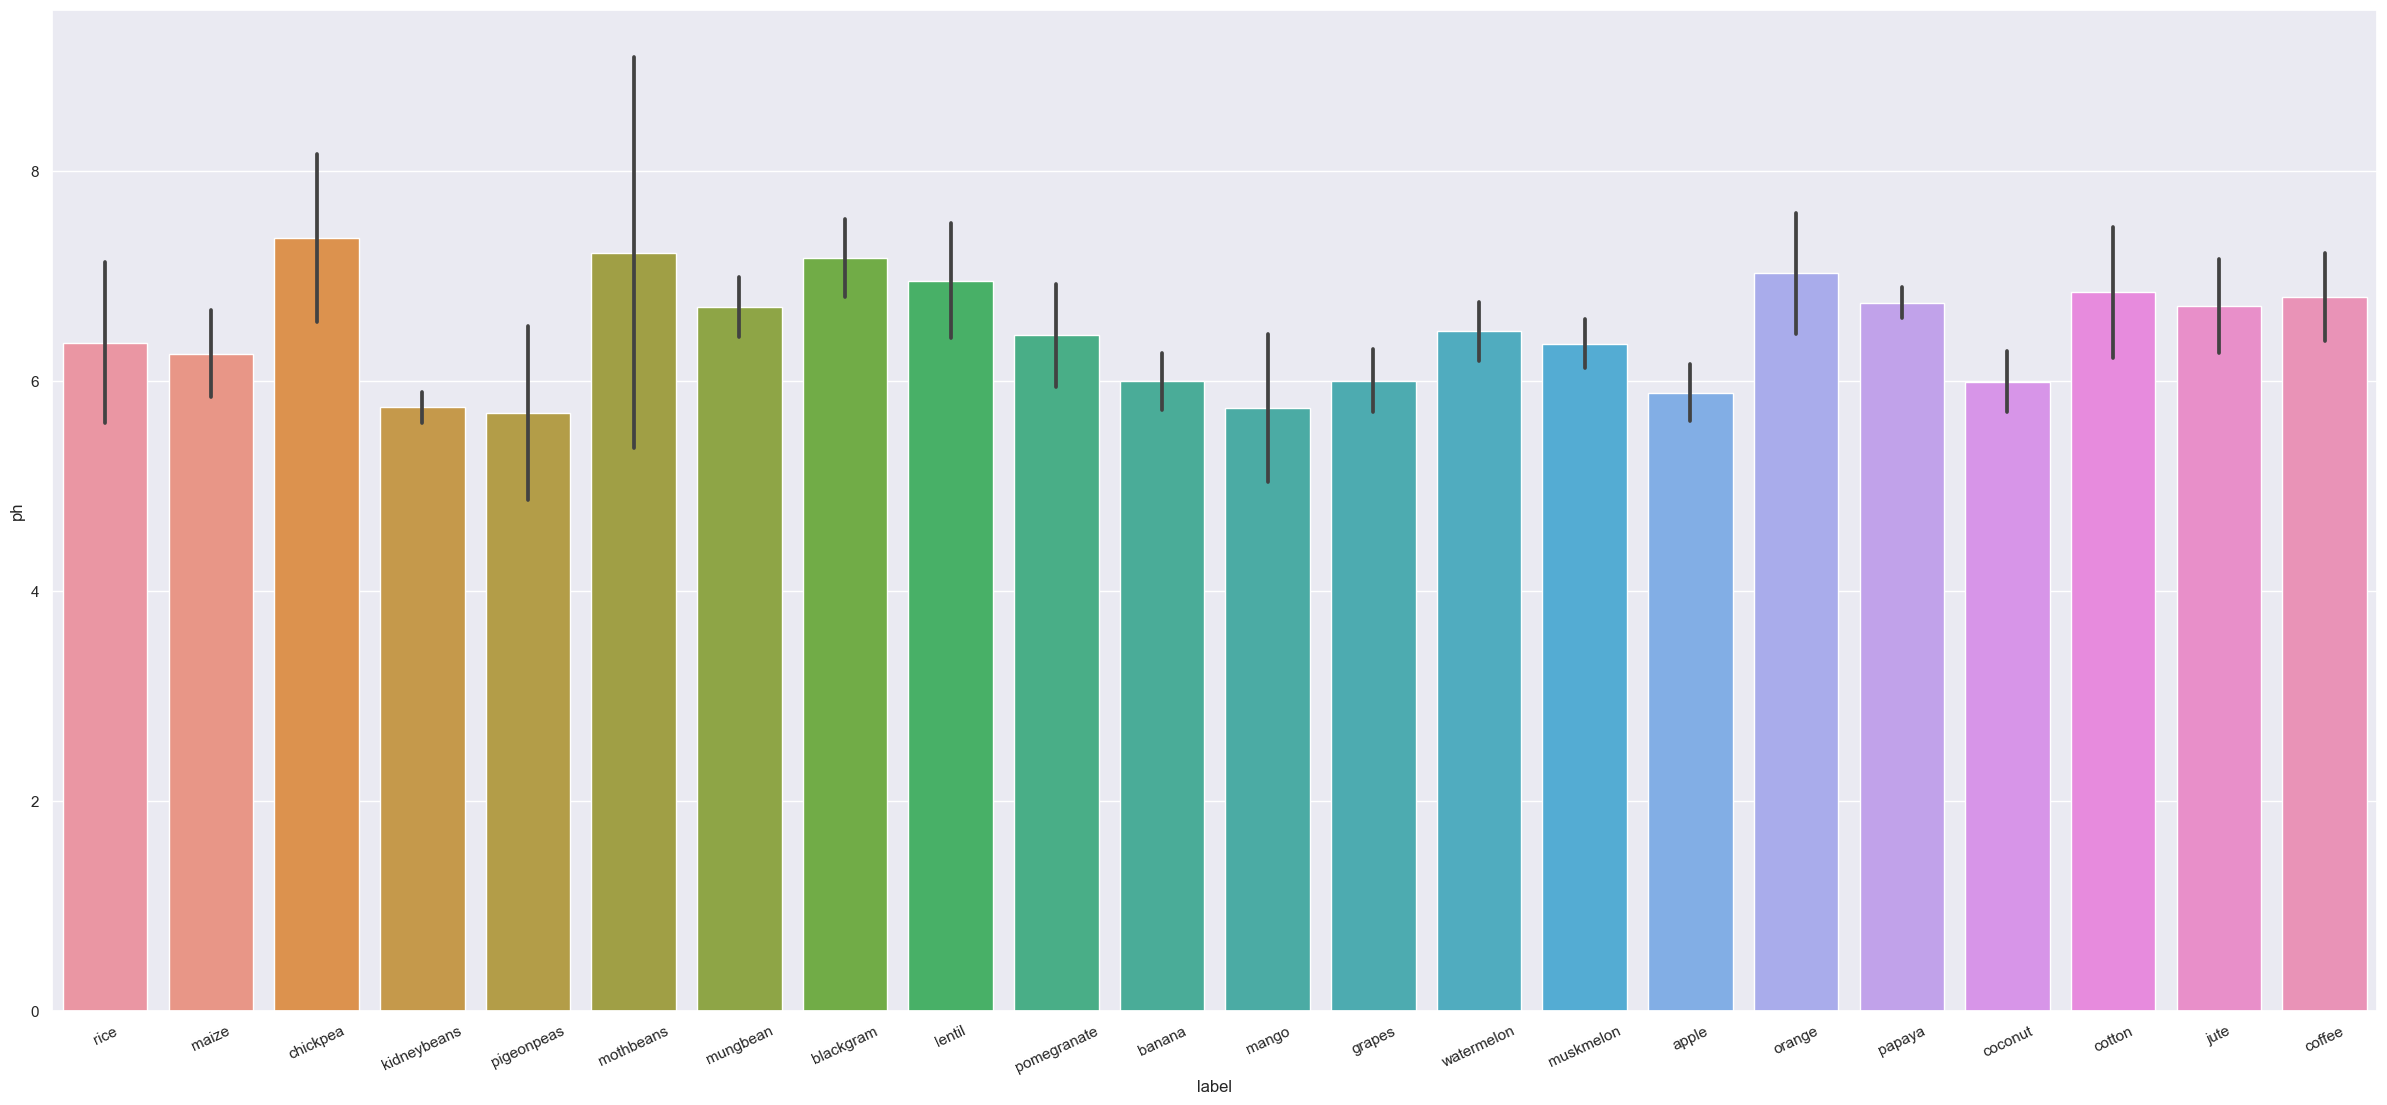

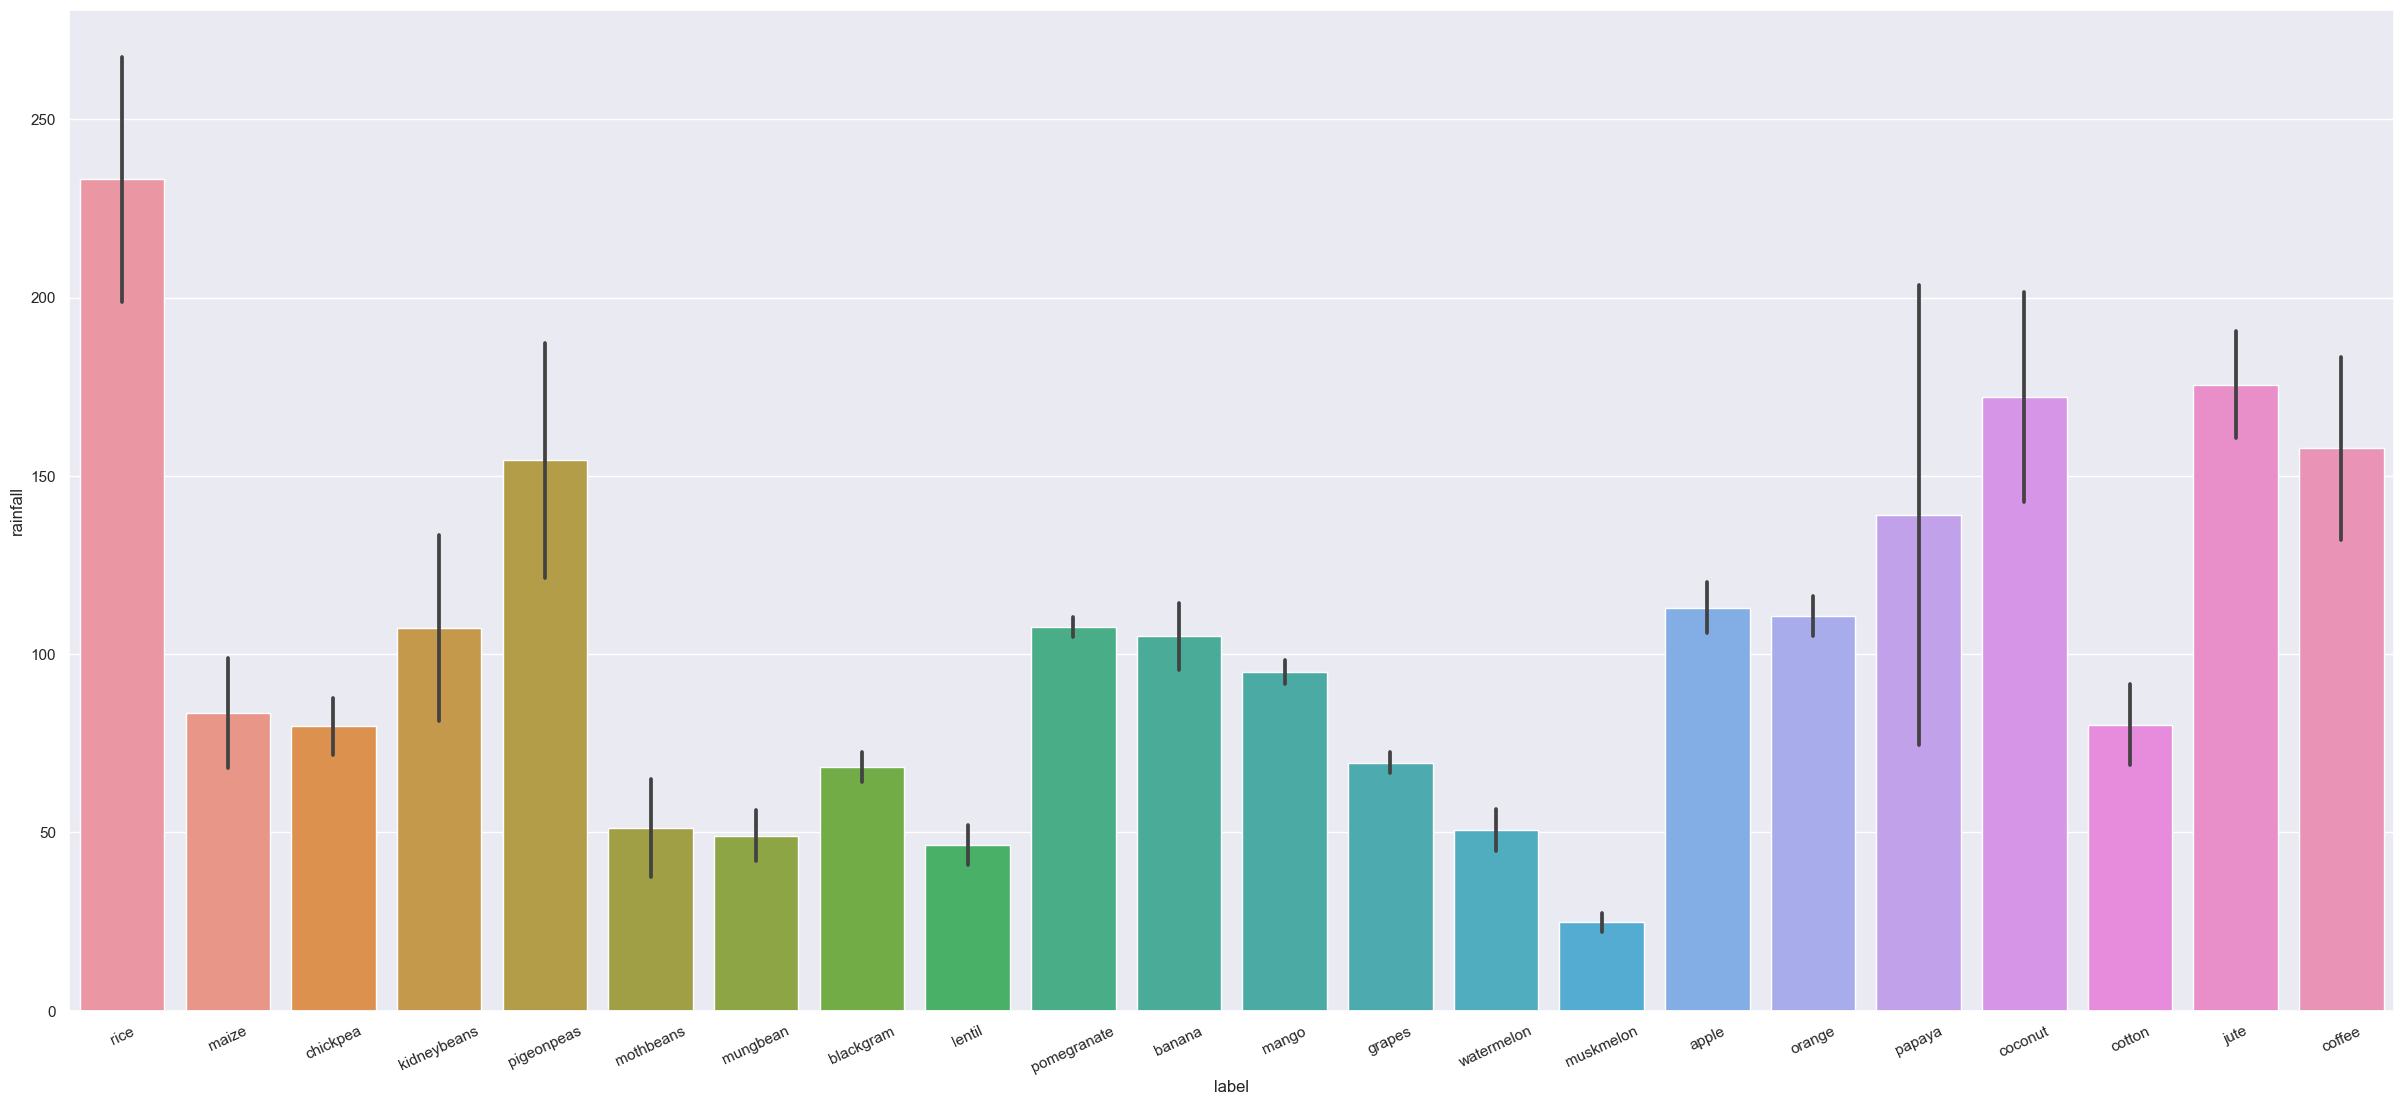

In [30]:

for y in df:
  if pd.api.types.is_numeric_dtype(df[y]):
    plt.figure(figsize=(30, 13))
    viz = sns.barplot(x=df['label'], y=df[y], estimator=np.median, ci='sd');
    viz.set_xticklabels(viz.get_xticklabels(), rotation=25);

Variance of each feature on a crop appears constant, as seen by the tick marks above each label, but the effect of some variables on certain crops appears to have huge impact. For example the amount of rainfall on papaya, pigeonpea, rice, coffee and kidney beans are larger than the average value needed for other crops, same as in ph on mothbeans, temperature on grapes, oranges and pigeon peas and humidity on pigeon peas. K & P on apple and grapes, N on cotton and watermelon.

#### 6.1 Intuitively separating dataset to Analyse Weather Factors on label and soil nutrients on Label

In [31]:
#Selecting Weather features for analysis

weather_df = df[['temperature', 'humidity', 'rainfall']]
ecology_df = df[['N', 'P', 'K', 'ph']]
label_df = df.iloc[:,-1]

ecology = pd.concat([ecology_df, label_df], axis='columns')
weather = pd.concat([weather_df, label_df], axis='columns')

ecology.set_index('label', inplace=True)
# weather.set_index('label', inplace=True)


ecology = pd.pivot_table(ecology,index=['label'],
aggfunc='mean')

weather = pd.pivot_table(weather,index=['label'],
aggfunc='mean')


In [32]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from random import randint
import random 
colors = []

for i in range(50):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

sorted_K = ecology.sort_values(by='K',
ascending=False)
fig = make_subplots(rows=1, cols=2)
top = {
'y' : sorted_K['K'][0:10].sort_values().index,
'x' : sorted_K['K'][0:10].sort_values()
}
last = {
'y' : sorted_K['K'][-10:].index,
'x' : sorted_K['K'][-10:]
}
fig.add_trace(
go.Bar(top,
name="Most potassium required",
marker_color=random.choice(colors),
orientation='h',
text=top['x']),
row=1, col=1
)
fig.add_trace(
go.Bar(last,
name="Least potassium required",
marker_color=random.choice(colors),
orientation='h',
text=last['x']),
row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Potassium (K)",
plot_bgcolor='white',
font_size=10,
font_color='black',
height=500)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()
    

The plot shows the effect or amount of potassium needed for each crop type

In [33]:
sorted_N = ecology.sort_values(by='N',
ascending=False)
fig = make_subplots(rows=1, cols=2)
top = {
'y' : sorted_N['N'][0:10].sort_values().index,
'x' : sorted_N['N'][0:10].sort_values()
}
last = {
'y' : sorted_N['N'][-10:].index,
'x' : sorted_N['N'][-10:]
}
fig.add_trace(
go.Bar(top,
name="Most nitrogen required",
marker_color=random.choice(colors),
orientation='h',
text=top['x']),
row=1, col=1
)
fig.add_trace(
go.Bar(last,
name="Least nitrogen required",
marker_color=random.choice(colors),
orientation='h',
text=last['x']),
row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Nitrogen (N)",
plot_bgcolor='white',
font_size=10,
font_color='black',
height=500)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()
    

The plot shows the amount of nitrogen needed for each crop growth

In [34]:
sorted_P = ecology.sort_values(by='P',
ascending=False)
fig = make_subplots(rows=1, cols=2)
top = {
'y' : sorted_P['P'][0:10].sort_values().index,
'x' : sorted_P['P'][0:10].sort_values()
}
last = {
'y' : sorted_P['P'][-10:].index,
'x' : sorted_P['P'][-10:]
}
fig.add_trace(
go.Bar(top,
name="Most phosphorus required",
marker_color=random.choice(colors),
orientation='h',
text=top['x']),
row=1, col=1
)
fig.add_trace(
go.Bar(last,
name="Least phosphorus required",
marker_color=random.choice(colors),
orientation='h',
text=last['x']),
row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Phosphorus (P)",
plot_bgcolor='white',
font_size=10,
font_color='black',
height=500)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()
    

The plot shows the effect of phosphorus needed for each crop growth

In [35]:
sorted_ph = ecology.sort_values(by='ph',
ascending=False)
fig = make_subplots(rows=1, cols=2)
top = {
'y' : sorted_ph['ph'][0:10].sort_values().index,
'x' : sorted_ph['ph'][0:10].sort_values()
}
last = {
'y' : sorted_ph['ph'][-10:].index,
'x' : sorted_ph['ph'][-10:]
}
fig.add_trace(
go.Bar(top,
name="Most pH required",
marker_color=random.choice(colors),
orientation='h',
text=top['x']),
row=1, col=1
)
fig.add_trace(
go.Bar(last,
name="Least pH required",
marker_color=random.choice(colors),
orientation='h',
text=last['x']),
row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="power of Hydrogen (pH)",
plot_bgcolor='white',
font_size=10,
font_color='black',
height=500)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

    

The plot shows the PH concentration of the soil, for each crop type.

In [36]:
fig = go.Figure()
fig.add_trace(go.Bar(
x=ecology.index,
y=ecology['N'],
name='Nitrogen',
marker_color='#0061ff'
))
fig.add_trace(go.Bar(
x=ecology.index,
y=ecology['P'],
name='Phosphorous',
marker_color='#60efff'
))
fig.add_trace(go.Bar(
x=ecology.index,
y=ecology['K'],
name='Potassium',
marker_color='#e81cff'
))
fig.add_trace(go.Bar(
x=ecology.index,
y=ecology['ph'],
name='PH',
marker_color='#a9ff68'
))
fig.update_layout(title="Composition of Soil Nutrients and PH for each Crop",
plot_bgcolor='white',
barmode='group',
xaxis_tickangle=-45)



For each crop the soil composition of a certain nutrient(N,P,K) varies while that PH concentration also varies between the range of 7 and 5 meaning mostly acidic solutions while some have basic or neutral concentration.

In [37]:
fig = px.bar(data_viz, x=data_viz.index, y=["rainfall", "temperature", "humidity"])
fig.update_layout(title_text="Crop Weather Conditions",
plot_bgcolor='white',
height=500)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Plot shows the measurable values of climatic conditions (temperature, rainfall, humidity) needed for each crop growth.

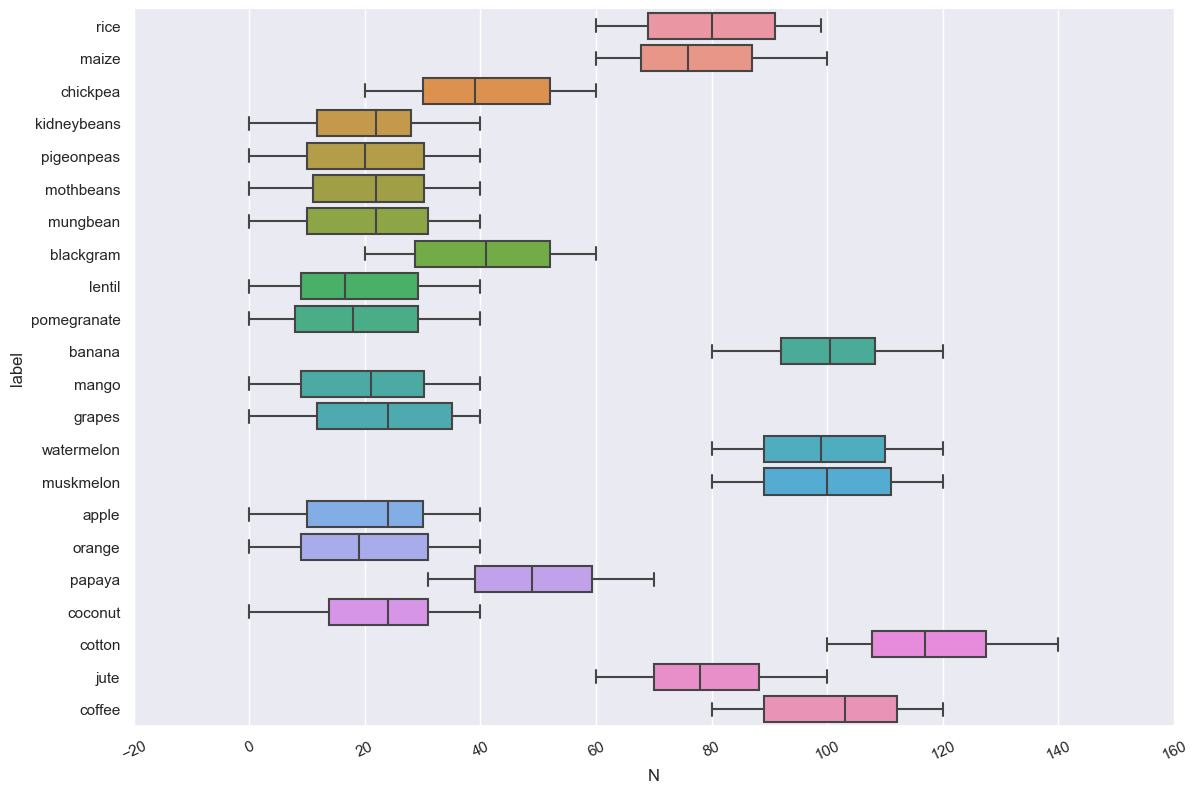

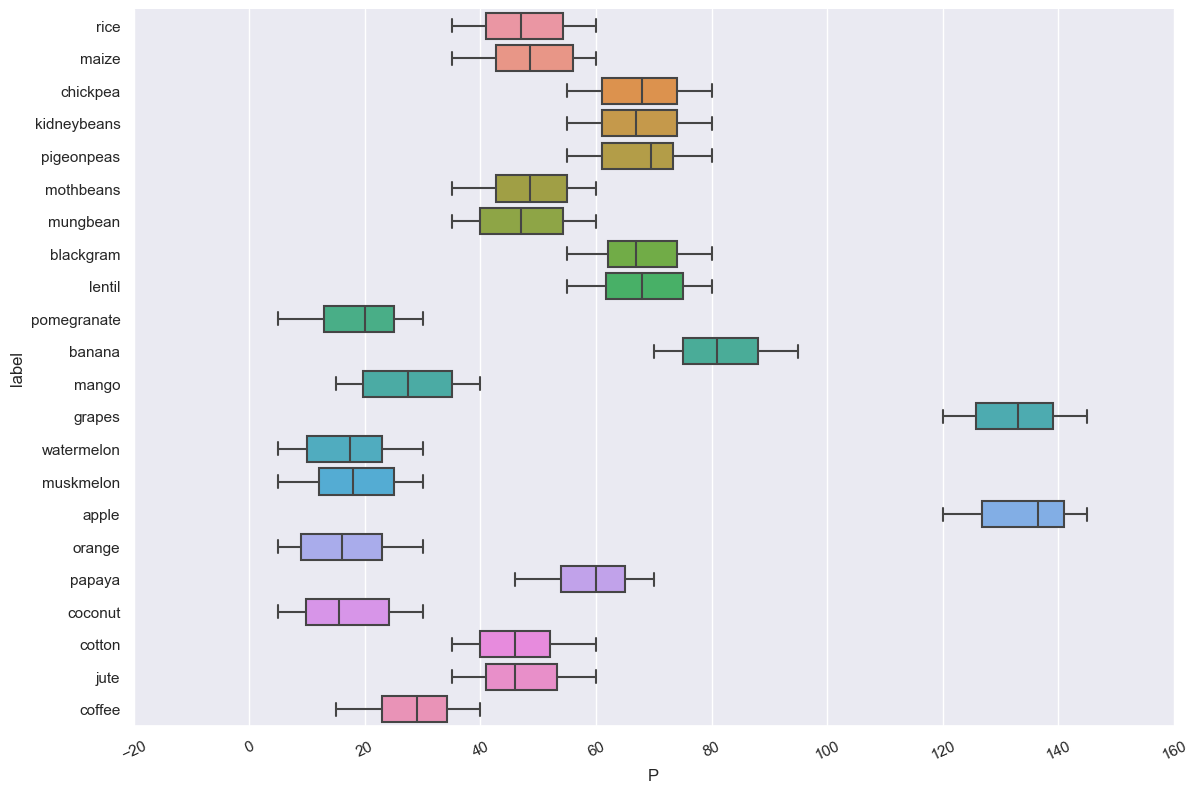

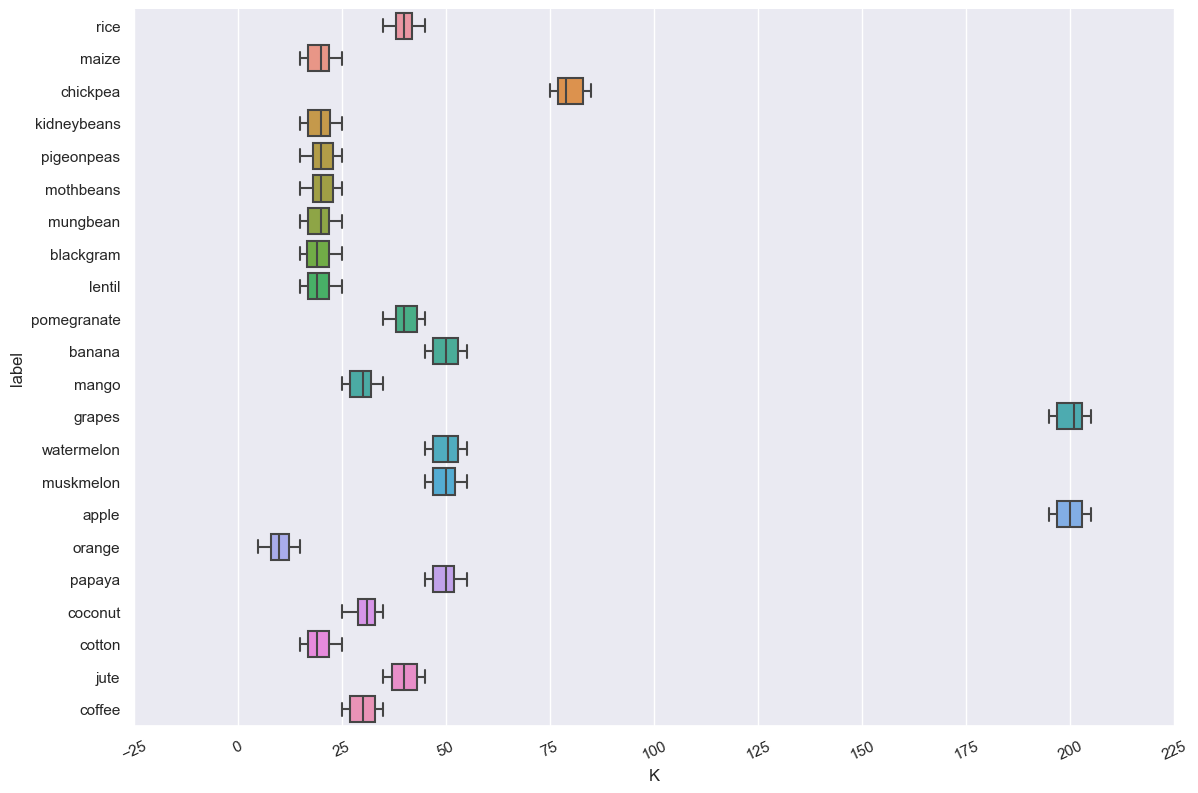

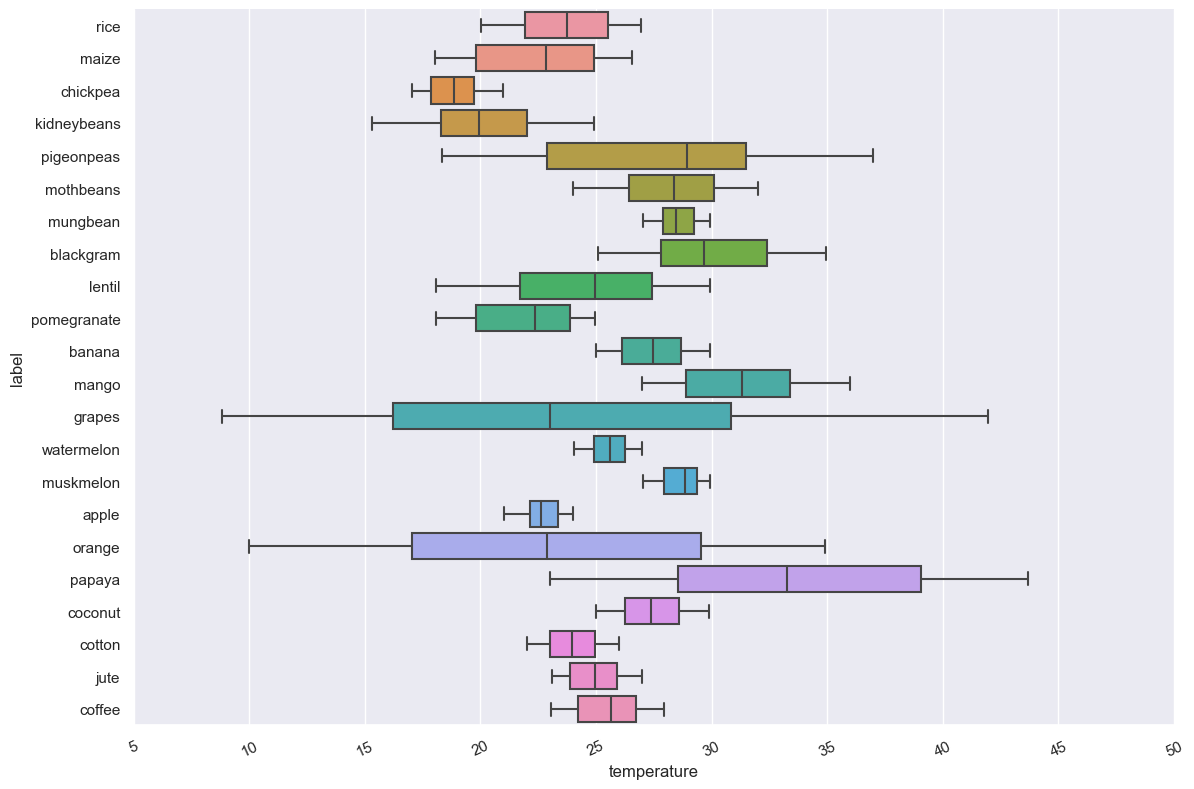

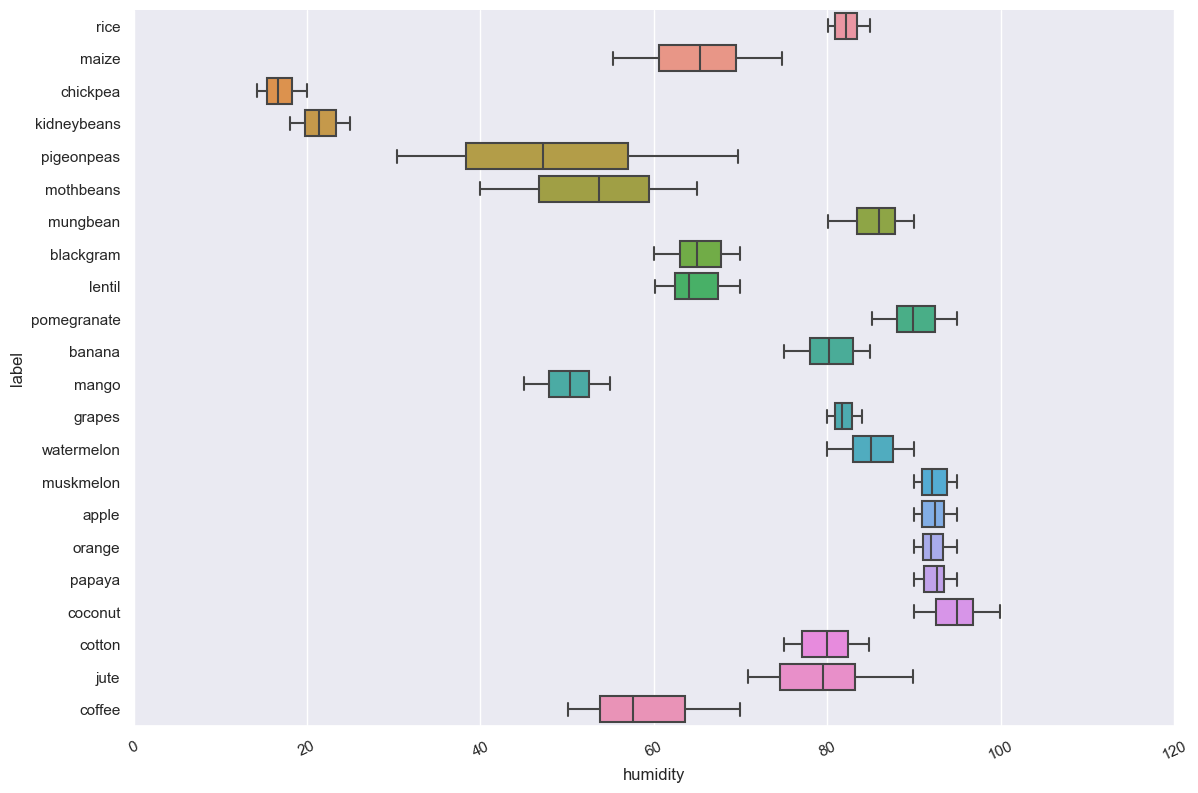

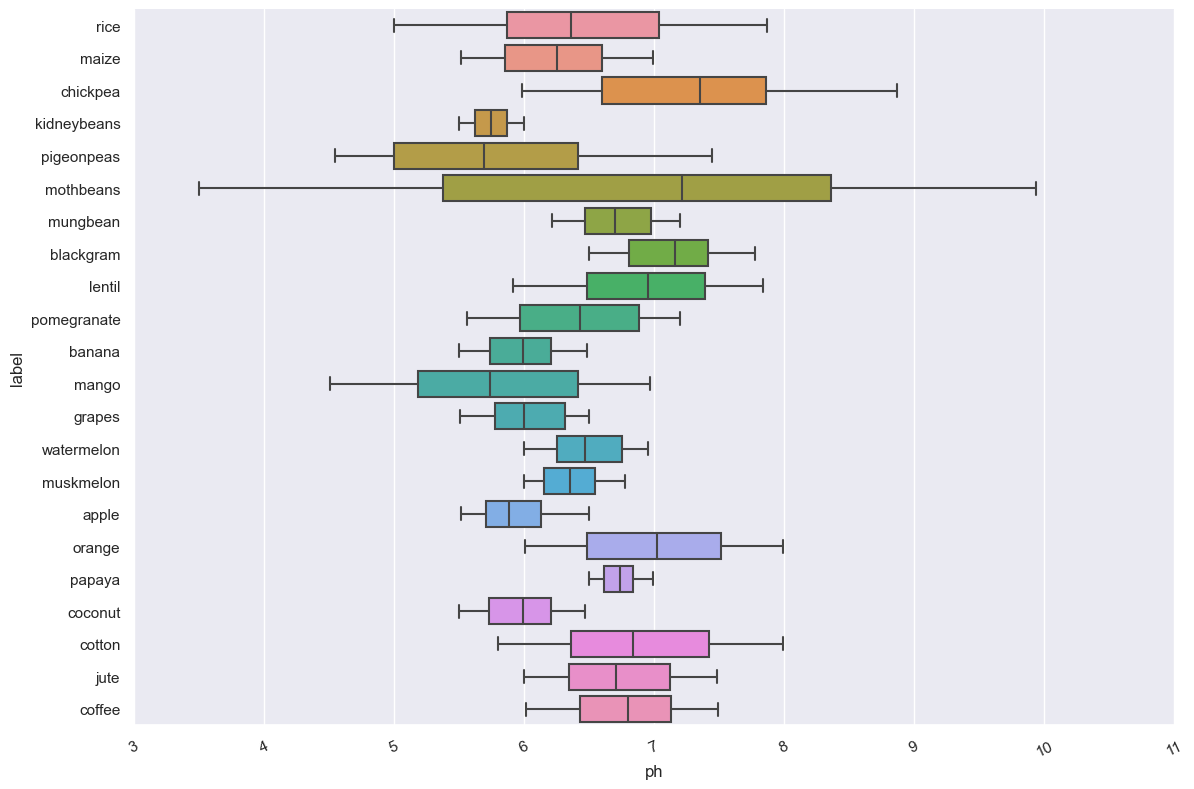

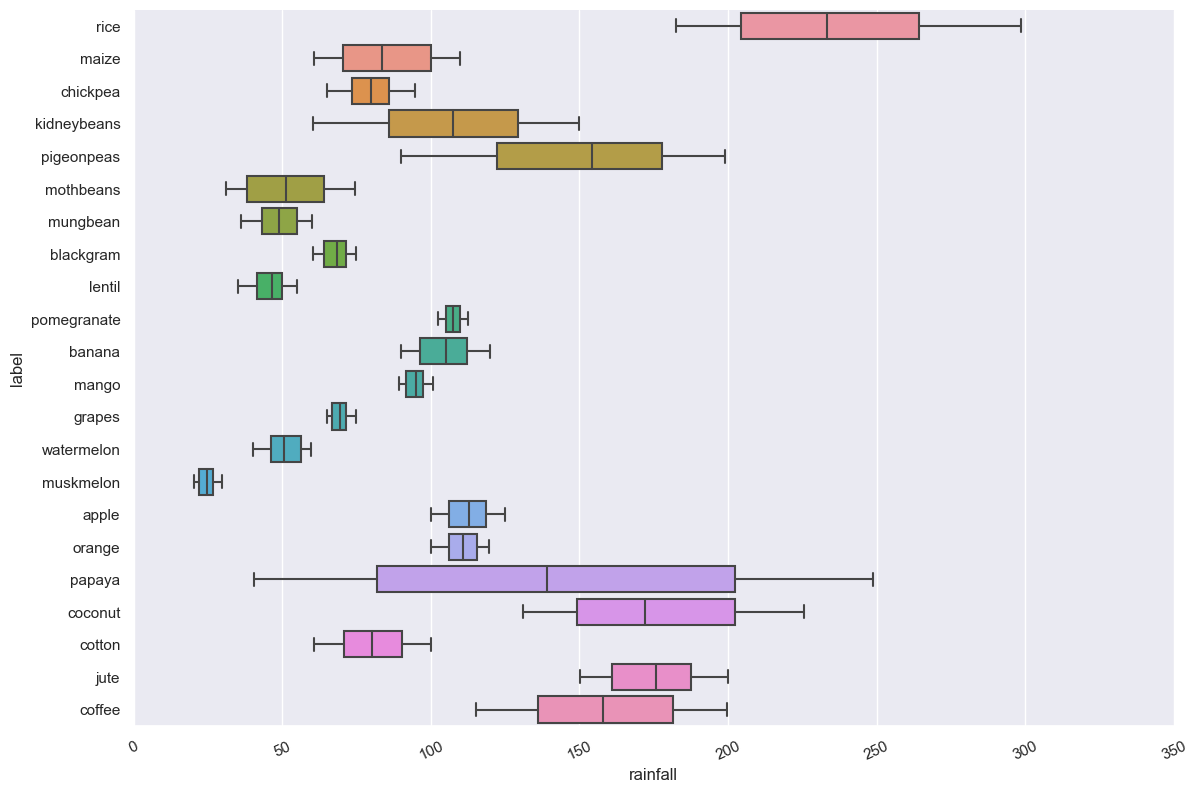

In [38]:
for y in df:
      if pd.api.types.is_numeric_dtype(df[y]):
        viz = sns.catplot(data=df, x=y, y='label', height=8, aspect=1.5, estimator=np.median, ci='sd', kind='box')
        viz.set_xticklabels(rotation=25)
plt.show()

This boxplot shows the range of values for the weather conditions and soil macro nutrients needed for different crop type.

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower    upper  reject
---------------------------------------------------------------
      apple      banana    79.43    0.0   73.356  85.504   True
      apple   blackgram    19.22    0.0   13.146  25.294   True
      apple    chickpea    19.29    0.0   13.216  25.364   True
      apple     coconut     1.18    1.0   -4.894   7.254  False
      apple      coffee     80.4    0.0   74.326  86.474   True
      apple      cotton    96.97    0.0   90.896 103.044   True
      apple      grapes     2.38 0.9989   -3.694   8.454  False
      apple        jute     57.6    0.0   51.526  63.674   True
      apple kidneybeans    -0.05    1.0   -6.124   6.024  False
      apple      lentil    -2.03 0.9999   -8.104   4.044  False
      apple       maize    56.96    0.0   50.886  63.034   True
      apple       mango    -0.73    1.0   -6.804   5.344  False
      apple   mothbeans     0.64    1.0 

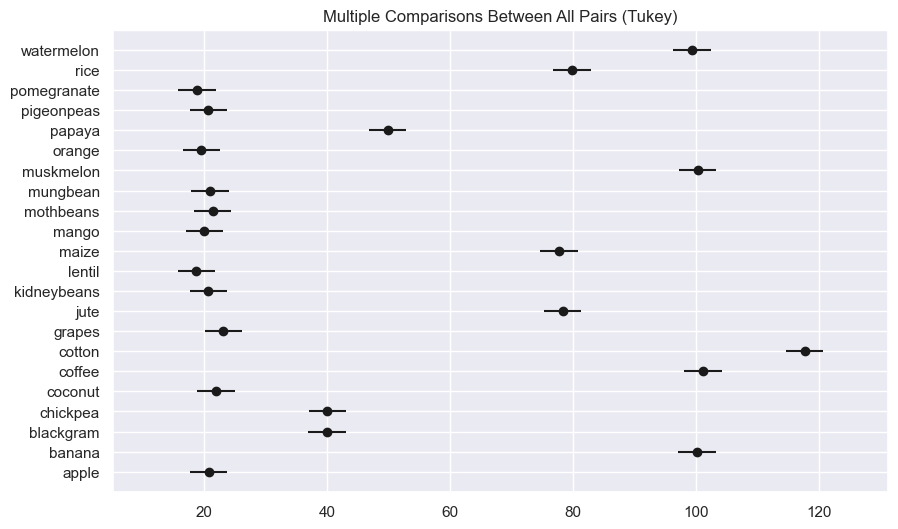

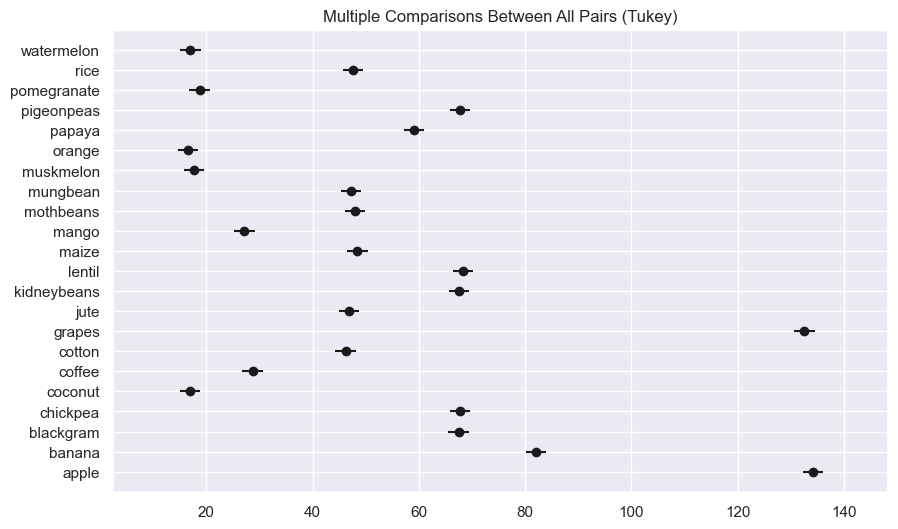

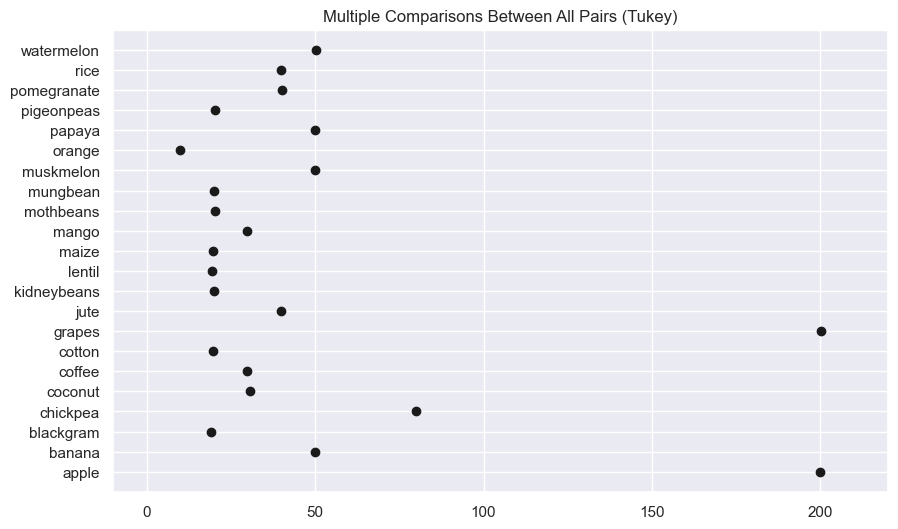

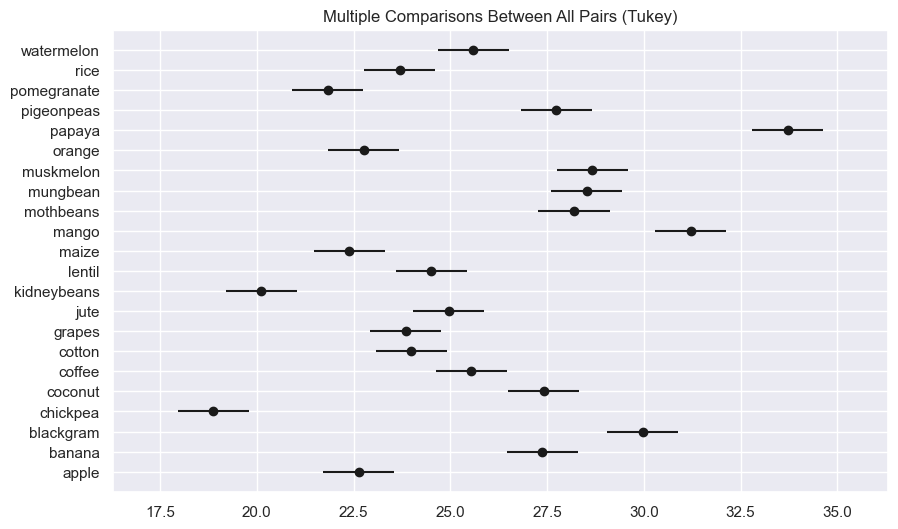

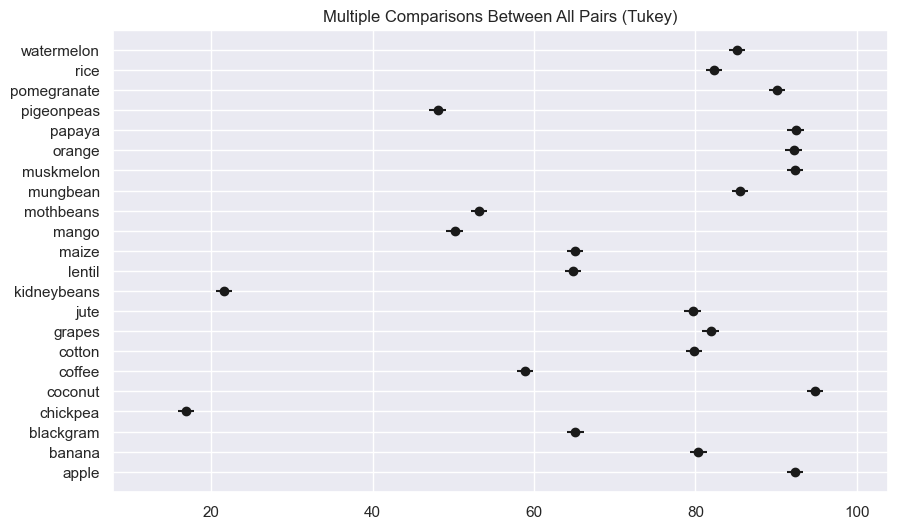

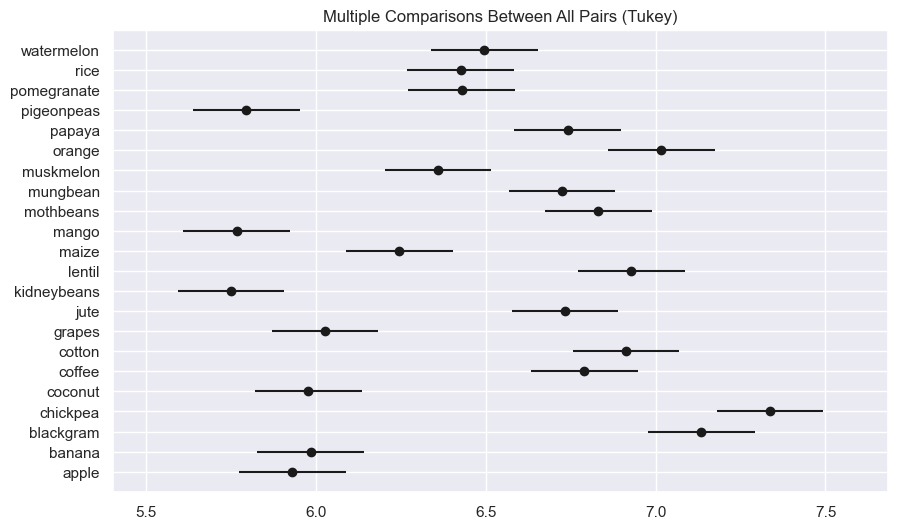

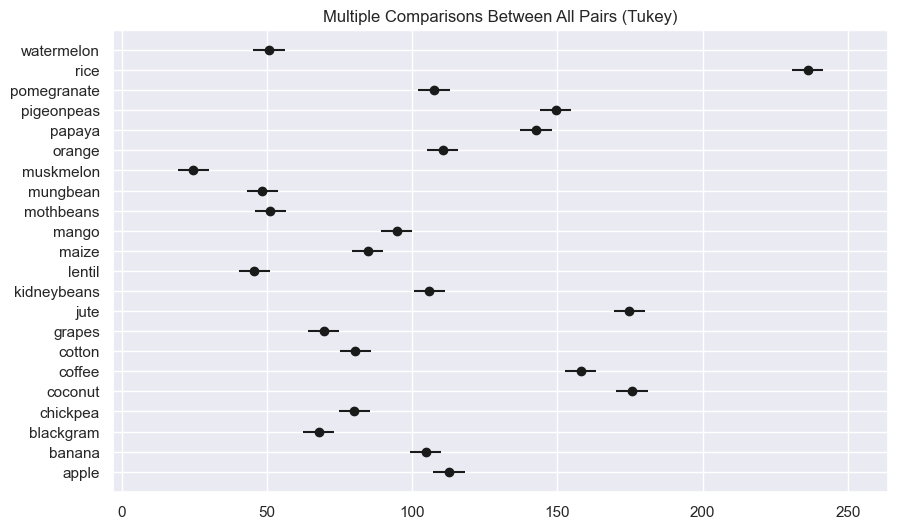

In [39]:
from statsmodels.stats.multicomp import MultiComparison

for col in df:
  if pd.api.types.is_numeric_dtype(df[col]):
    mc = MultiComparison(df[col], df['label'])
    comp_variables = mc.tukeyhsd()
    print(comp_variables)
    comp_variables.plot_simultaneous()

This shows the comparison of each label pair to other pairs. This pairwise comparison of the label categorical values to the variables, presents values of an adjusted p-value, that makes it difficult to get below cutoff 0.05. The only relevant value are statistically significant when they are True, suggesting that the comparison of large number of combinations would not yield a significant value based on luck.

In [40]:
l_types = df.label.unique()
ttests = []
for i, e in enumerate(l_types):
  for i2, e2 in enumerate(l_types):
    for col in df:
      if pd.api.types.is_numeric_dtype(df[col]):
        if i2 > i:
          g1 = df[df['label'] == e][col]
          g2 = df[df['label'] == e2][col]
          t, p = stats.ttest_ind(g1, g2)

          ttests.append([f'{e} - {e2}:', t.round(4), p.round(4)])


threshold = 0.05 / len(ttests)
print(f'Significant t-tests bonferonni below {threshold}')
for t in ttests:
  if t[2] <= threshold:
    print(t)


Significant t-tests bonferonni below 3.0921459492888065e-05
['rice - maize:', 48.232, 0.0]
['rice - maize:', 30.5146, 0.0]
['rice - maize:', 40.2144, 0.0]
['rice - chickpea:', 23.3844, 0.0]
['rice - chickpea:', -18.5486, 0.0]
['rice - chickpea:', -91.1171, 0.0]
['rice - chickpea:', 20.5477, 0.0]
['rice - chickpea:', 294.2246, 0.0]
['rice - chickpea:', -8.2096, 0.0]
['rice - chickpea:', 44.3528, 0.0]
['rice - kidneybeans:', 36.7181, 0.0]
['rice - kidneybeans:', -18.2353, 0.0]
['rice - kidneybeans:', 46.3271, 0.0]
['rice - kidneybeans:', 10.8341, 0.0]
['rice - kidneybeans:', 234.2199, 0.0]
['rice - kidneybeans:', 8.6421, 0.0]
['rice - kidneybeans:', 30.222, 0.0]
['rice - pigeonpeas:', 35.2006, 0.0]
['rice - pigeonpeas:', -18.7332, 0.0]
['rice - pigeonpeas:', 48.0499, 0.0]
['rice - pigeonpeas:', -6.6807, 0.0]
['rice - pigeonpeas:', 30.9463, 0.0]
['rice - pigeonpeas:', 5.5794, 0.0]
['rice - pigeonpeas:', 18.2262, 0.0]
['rice - mothbeans:', 35.5248, 0.0]
['rice - mothbeans:', 46.3307, 0.0]


A more stringent method of comparison is also implemented, using a threshold to set an acceptable significant value. Bonefferoni ttest comparison was implemented to explore the significance of two crop comparison on on each feature. A Pairwise comparison is implement, which is carried by setting a threshold for p-values. Threshold is set, by dividing 0.05 accepted cutoff, with length of t-test, and it gives us only the statistically significant p-value for label combination with each feature.

#### 6.2 Outlier Detection and Removal

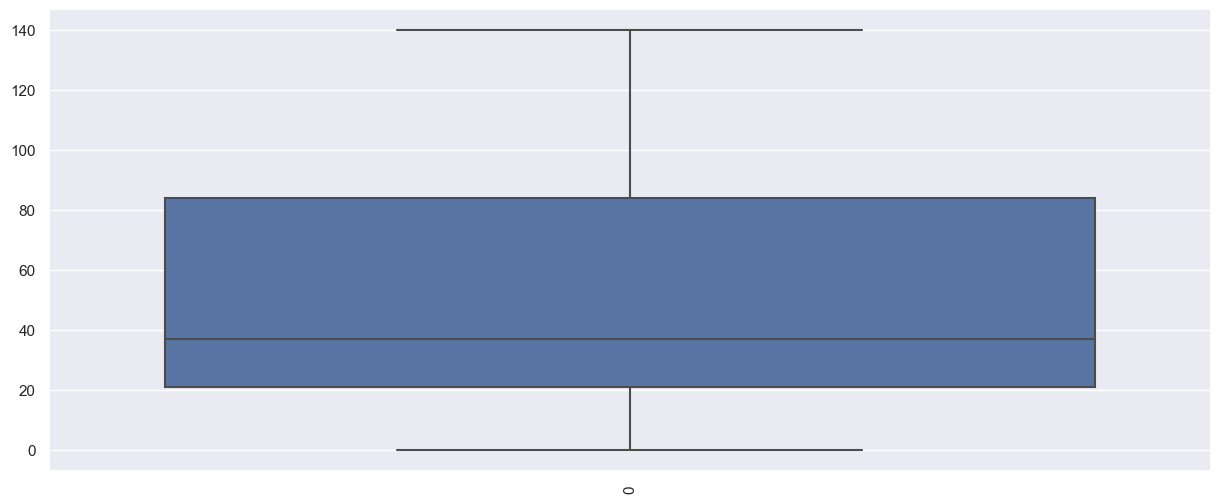

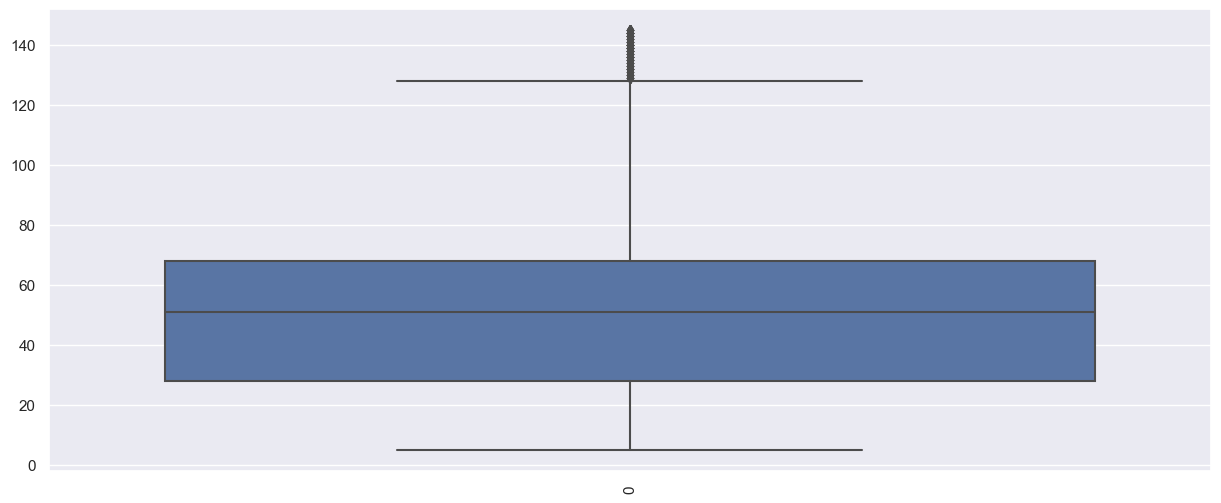

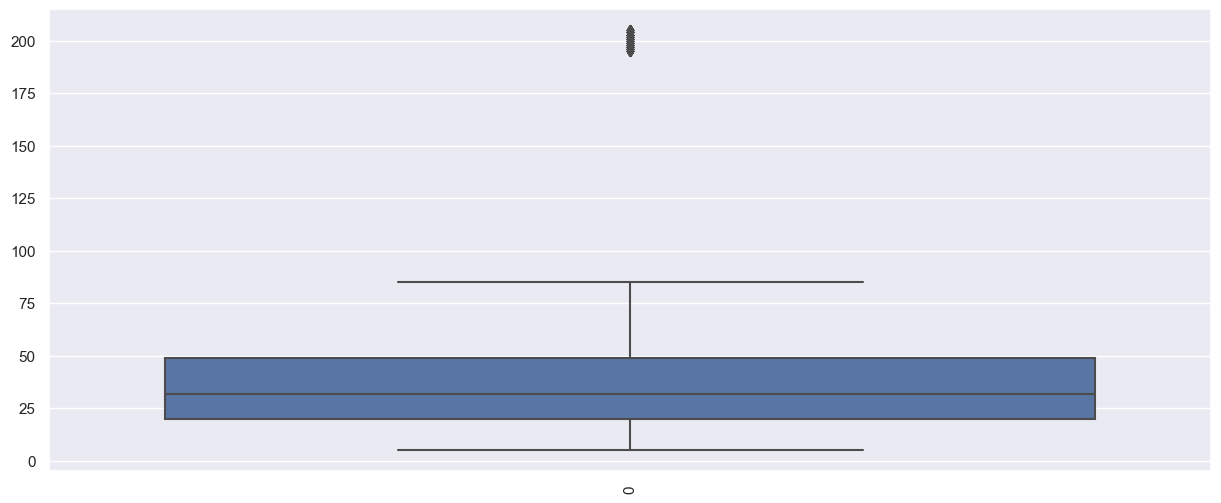

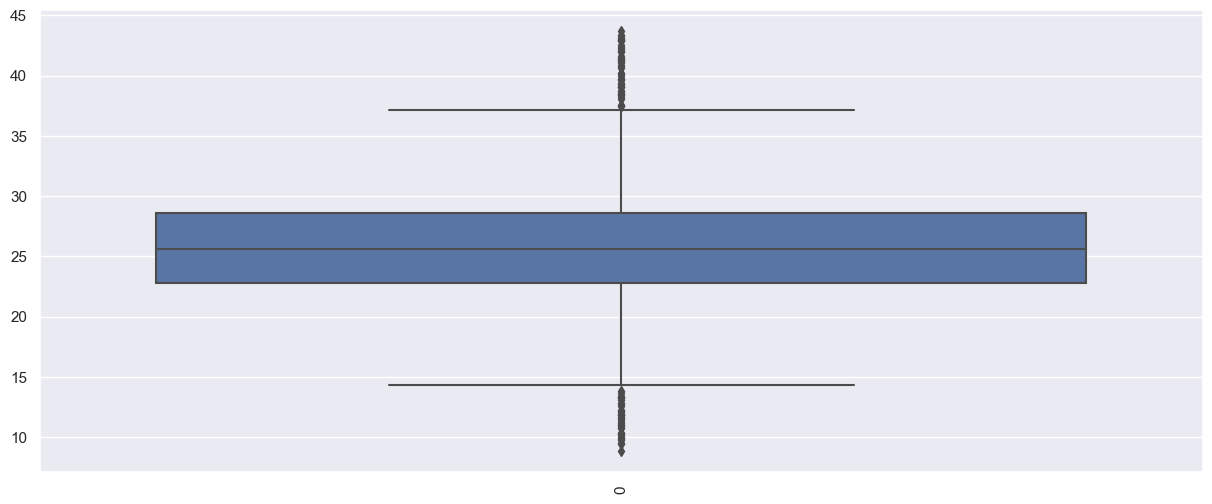

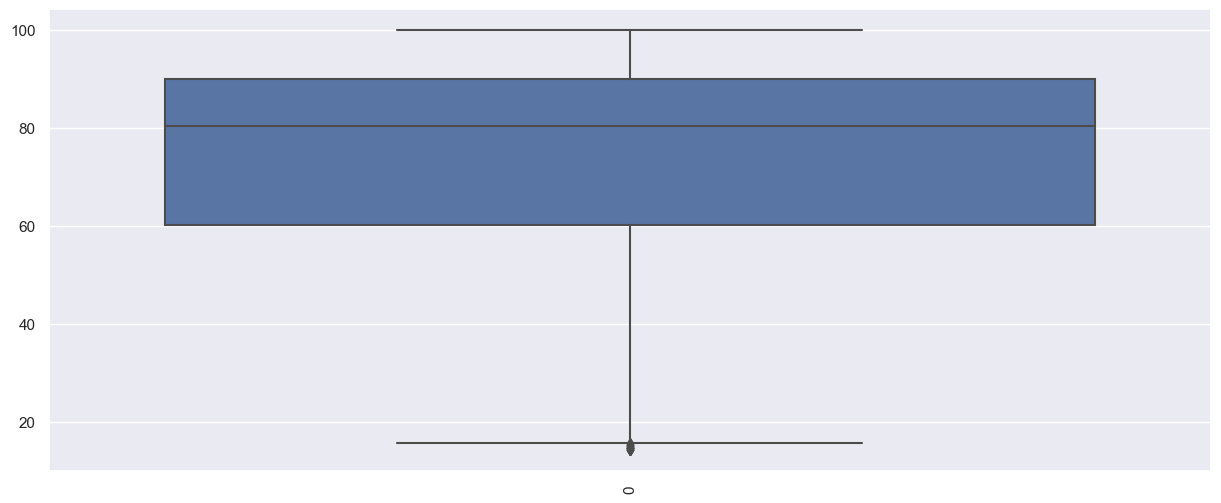

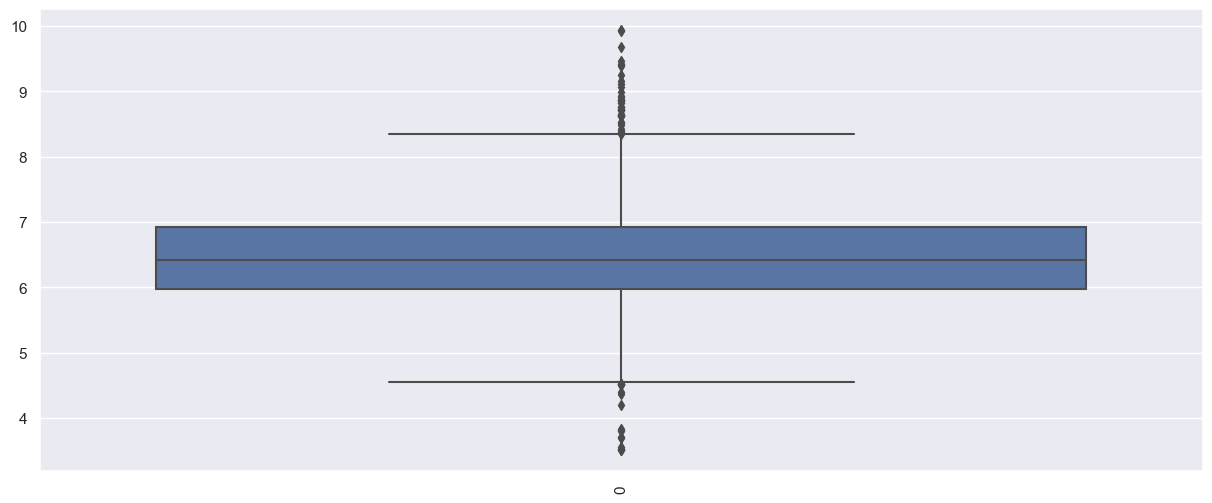

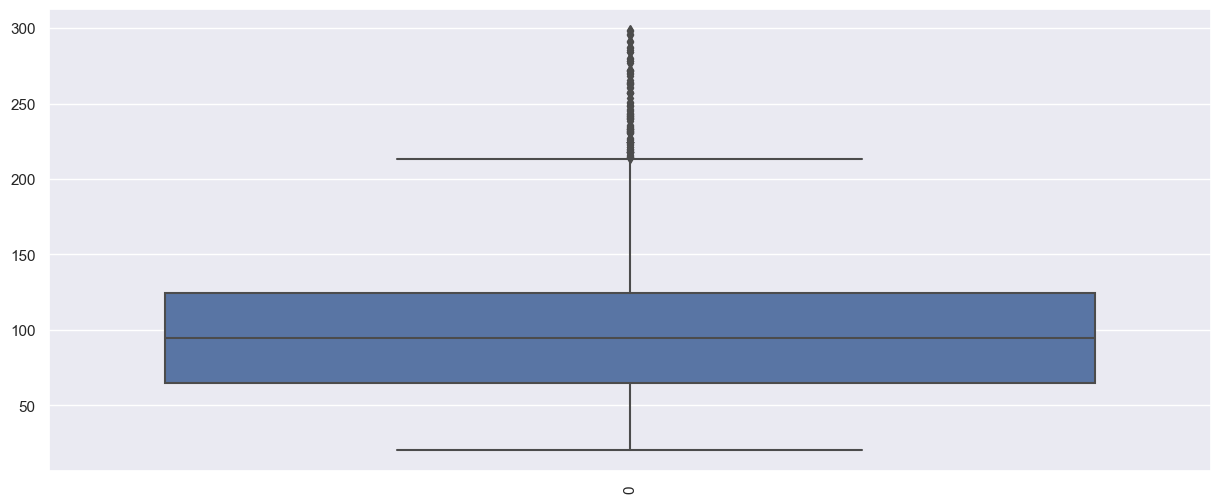

In [41]:
for col in df.columns:
    if col != 'label':
        plt.figure(figsize=(15,6))
        sns.boxplot(df[col])
        plt.xticks(rotation = 90)
    plt.show()

The plot shows that all features with the exception of N contains outliers.

In [42]:
#calculate z-score
z_score = (df - df.mean()) / df.std()

#identify outliers
outliers = z_score > 3

#remove outliers
df_without_outliers = df[~(z_score > 3).any(axis=1)]
df_without_outliers

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.87974,82.00274,6.50299,202.93554,rice
1,85,58,41,21.77046,80.31964,7.03810,226.65554,rice
2,60,55,44,23.00446,82.32076,7.84021,263.96425,rice
3,74,35,40,26.49110,80.15836,6.98040,242.86403,rice
4,78,42,42,20.13017,81.60487,7.62847,262.71734,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.77464,66.41327,6.78006,177.77451,coffee
2196,99,15,27,27.41711,56.63636,6.08692,127.92461,coffee
2197,118,33,30,24.13180,67.22512,6.36261,173.32284,coffee
2198,117,32,34,26.27242,52.12739,6.75879,127.17529,coffee


In [43]:
df_without_outliers.shape

(2045, 8)

**New record count is 2045 which shows a decrease of 155 records.Percentage of Data lost after outliers were removed is Percentage loss = (2200 - 2045) / 2200 x 100 = 7.05% of total initial data of 2200**

#### 6.3 Re-evaluating the data preprocessing step to check the effect of the data loss on statistics
- Basic Statistics 
- Check shape of data
- Check for Duplicate
- Check for Missing values
- Check Normality of Data

In [44]:
unistats(df_without_outliers)

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
temperature,2200,0,2200,float64,True,8.82567,25.61624,8.82567,22.76937,25.59869,28.56165,43.67549,5.06375,0.18493,1.23255
humidity,2200,0,2200,float64,True,14.25804,71.48178,14.25804,60.26195,80.47315,89.94877,99.98188,22.26381,-1.09171,0.30213
ph,2200,0,2200,float64,True,3.50475,6.46948,3.50475,5.97169,6.42505,6.92364,9.93509,0.77394,0.28393,1.65558
rainfall,2200,0,2200,float64,True,20.21127,103.46366,20.21127,64.55169,94.86762,124.26751,298.56012,54.95839,0.96576,0.60708
N,2200,0,137,int64,True,22,50.55182,0,21.00000,37.00000,84.25000,140,36.91733,0.50972,-1.05824
P,2200,0,117,int64,True,60,53.36273,5,28.00000,51.00000,68.00000,145,32.98588,1.01077,0.86028
K,2200,0,73,int64,True,17,48.14909,5,20.00000,32.00000,49.00000,205,50.64793,2.37517,4.44935
label,2200,0,22,object,False,apple,-,-,-,-,-,-,-,-,-


After we removed the outliers,K appears to be greatly skewed to the right, and humidity remains left skewed. The kurtosis for K also increased exponentially with lots of values clustered together having no spread.However the skewness and kurtosis of all other variables are within the acceptable range.

In [45]:
print("The shape of the dataset is: ", df_without_outliers.shape)

The shape of the dataset is:  (2045, 8)


In [46]:
n_duplicates = df_without_outliers.duplicated().sum()
print("There are", n_duplicates, "duplicated values in the dataset")

There are 0 duplicated values in the dataset


In [47]:
df_without_outliers.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

There are no missing values in the data

In [48]:
# Perform the Shapiro-Wilk test
df_sample = df_without_outliers.drop('label', axis=1)
r, p = stats.shapiro(df_sample)

# Print the p-value
# print('p-value:', p)
print('Statistics=%.3f, p=%.3f' % (r, p))
# Interpret the results
if p > 0.05:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.859, p=0.000
Sample does not look Gaussian (reject H0)


Dataset is not normally distributed which might only point to the K column that has a high skewness value

In [49]:
df_without_outliers.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.00000,-0.17971,-0.05189,0.02057,0.21433,0.11532,0.02125
P,-0.17971,1.00000,0.61765,-0.10383,-0.23362,-0.08799,-0.04501
K,-0.05189,0.61765,1.00000,-0.13410,0.12878,-0.10958,-0.02656
temperature,0.02057,-0.10383,-0.13410,1.00000,0.22643,-0.05271,-0.05391
humidity,0.21433,-0.23362,0.12878,0.22643,1.00000,0.04379,0.07505
ph,0.11532,-0.08799,-0.10958,-0.05271,0.04379,1.00000,-0.09745
rainfall,0.02125,-0.04501,-0.02656,-0.05391,0.07505,-0.09745,1.00000


The plot shows the correlation between variable pairs and seen the correlation coefficient between P & K have reduced from 0.74 to 0.61

In [50]:
df_without_outliers['K'].corr(df_without_outliers['P'])

0.6176461110474326

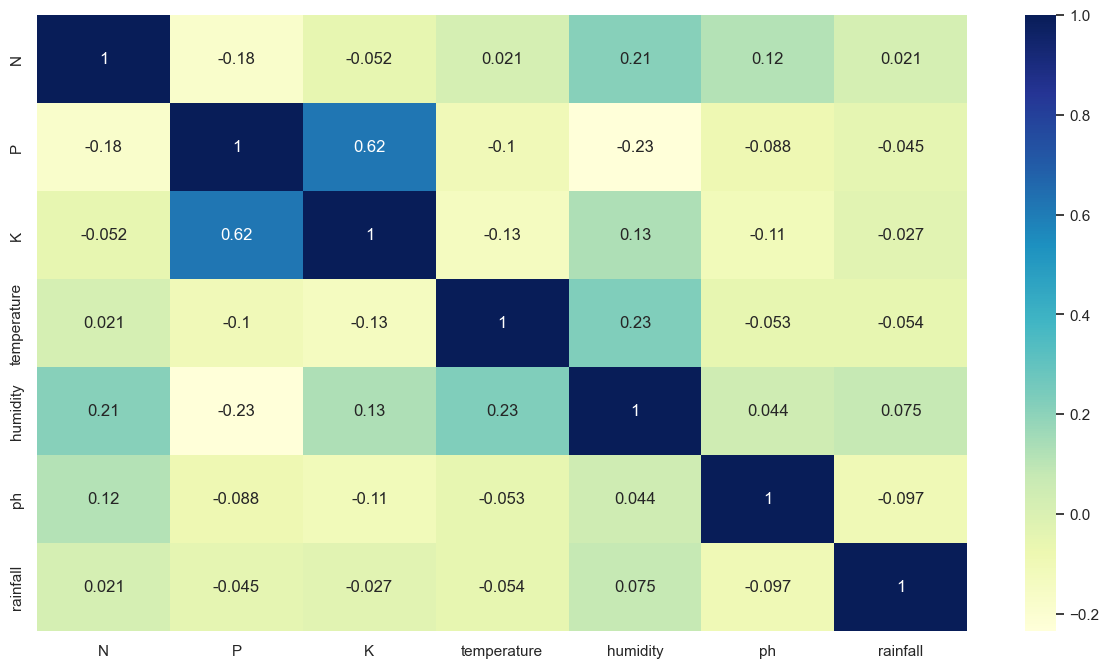

In [51]:
plt.figure(figsize=(15, 8))
dp = sns.heatmap(df_without_outliers.corr(), cmap="YlGnBu", annot=True)
plt.show()

The plot shows a slightly elevated positive correlation between potassium and Phosphorus within the dataset which is lower than that seen when the dataset contained outliers.

## 7 Feature Engineering 

#### 7.1 Boxcox Transformation and conversion to a series 
- Appending the new column to the dataset

In [52]:
from scipy.stats import boxcox

opt_lambda = boxcox(df_without_outliers['K'])[1]
transformed_data = boxcox(df_without_outliers['K'], lmbda=opt_lambda)
transformed_data

array([2.32246929, 2.30579676, 2.33043747, ..., 2.19074158, 2.23805751,
       2.19074158])

In [53]:
df_new_K = pd.DataFrame(transformed_data)
df_new_K.skew()

0   -0.04739
dtype: float64

In [54]:
df_without_outliers['K_new'] = transformed_data

As mentioned above, using shapiro-wilks test the data appears non gaussian which leads us to suspect the K column as the cause of this behaviour since it's skewness is high.Hence we transform the K column using boxcox transformation and created a new column (k_new) which is appended to the dataset.The skewness of K is now negatively skewed to the left within the acceptable range

## 8. Feature Scaling

#### 8.1 Implementing StandardScaler on Dataset

In [56]:
from sklearn.preprocessing import StandardScaler

X = df_without_outliers.drop(['label', 'K'], axis=1)
y = df_without_outliers['label']
scaled = StandardScaler()
x_scaled = scaled.fit_transform(X)
x_scaled

array([[ 1.02310378e+00, -2.63120092e-01, -1.00891773e+00, ...,
         5.07989822e-02,  1.90861715e+00,  5.47521216e-01],
       [ 8.89309559e-01,  2.84509793e-01, -8.18835653e-01, ...,
         7.72479994e-01,  2.35800386e+00,  4.78535100e-01],
       [ 2.20338468e-01,  1.81829189e-01, -5.55496628e-01, ...,
         1.85425190e+00,  3.06483512e+00,  5.80491260e-01],
       ...,
       [ 1.77235140e+00, -5.71161903e-01, -3.14919126e-01, ...,
        -1.38521964e-01,  1.34759051e+00,  2.47007044e-03],
       [ 1.74559255e+00, -6.05388771e-01,  1.41896382e-01, ...,
         3.95795102e-01,  4.73303307e-01,  1.98249691e-01],
       [ 1.39772759e+00, -1.08456492e+00, -4.27762734e-01, ...,
         4.24170914e-01,  7.34026182e-01,  2.47007044e-03]])

In [57]:
df_test_analysis = pd.DataFrame(x_scaled, columns=X.columns)
df_test_analysis

,N,P,temperature,humidity,ph,rainfall,K_new
0,1.02310,-0.26312,-1.00892,0.50158,0.05080,1.90862,0.54752
1,0.88931,0.28451,-0.81884,0.42695,0.77248,2.35800,0.47854
2,0.22034,0.18183,-0.55550,0.51568,1.85425,3.06484,0.58049
3,0.59496,-0.50271,0.18856,0.41980,0.69467,2.66508,0.44240
4,0.70200,-0.26312,-1.16888,0.48394,1.56870,3.04121,0.51355
...,...,...,...,...,...,...,...
2040,1.47800,-0.53694,0.24907,-0.18969,0.42448,1.43193,0.10428
2041,1.26393,-1.18725,0.38618,-0.62322,-0.51033,0.48750,-0.16775
2042,1.77235,-0.57116,-0.31492,-0.15369,-0.13852,1.34759,0.00247
2043,1.74559,-0.60539,0.14190,-0.82316,0.39580,0.47330,0.19825


Output from scaling which is an array is converted to DataFrame